<a href="https://colab.research.google.com/github/Saran4B/MachineLearning/blob/main/Multi-Class%20Credit%20Score/Muti_Class_CreditScore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Score EDA and Predict Multi-Classification

### Problem Statement
- You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

### Table of Content
- Importing Packages
- Reading Data
- EDA Process
- Data Cleanning
- Data Preprocessing
- Train and Evaluate Models

###Data Validation for modeling :

- Observations : 100,000

- Variables : 28

### Variables Description :
- ID: An identifier for each record in the dataset.
- Customer_ID: Identifier for individual customers.
- Month: The month associated with the data entry.
- Name: Customer's name.
- Age: Customer's age.
- SSN: Social Security Number or some other form of identification.
- Occupation: Customer's occupation or job title.
- Annual_Income: Customer's annual income.
- Monthly_Inhand_Salary: The amount of money the customer receives as salary on a monthly basis.
- Num_Bank_Accounts: Number of bank accounts the customer has.
- Num_Credit_Card: Number of credit cards the customer possesses.
- Interest_Rate: The interest rate associated with some financial aspect (e.g., loans or credit cards).
- Num_of_Loan: Number of loans the customer has.
- Type_of_Loan: The type of loan(s) the customer has (e.g., mortgage, personal loan, etc.).
- Delay_from_due_date: Delay in payments from the due date.
- Num_of_Delayed_Payment: Number of delayed payments.
- Changed_Credit_Limit: Indicates if the customer has changed their credit limit.
- Num_Credit_Inquiries: Number of credit inquiries made by the customer.
- Credit_Mix: The mix of different types of credit accounts (e.g., credit cards, loans).
- Outstanding_Debt: The amount of outstanding debt.
- Credit_Utilization_Ratio: The ratio of credit used to the total credit limit.
- Credit_History_Age: The age of the customer's credit history.
- Payment_of_Min_Amount: Payment behavior regarding minimum required payments.
- Total_EMI_per_month: Total Equated Monthly Installment (EMI) payments made by the customer.
- Amount_invested_monthly: The amount the customer invests on a monthly basis.
- Payment_Behaviour: Behavior related to payments, possibly indicating patterns or trends.
- Monthly_Balance: The customer's monthly balance in their financial accounts.
- Credit_Score: The credit score associated with the customer's creditworthiness.

###Programming Language :

- Training models base on sklearn package with Python

### Summary
- from the results of the model and evaluate metrics, The best model for credit score is XGBoost by the accuracy, f1-score, precision score, and recall score and accepted the accuracy at 87.92%

## Import Packages

In [ ]:
# Packages for EDA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer


# Modeling and evaluation
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    BaggingClassifier,
    ExtraTreesClassifier,
    RandomForestClassifier,
    StackingClassifier,
    AdaBoostClassifier,
    HistGradientBoostingClassifier
)
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import joblib

# Packages options
sns.set(rc={'figure.figsize': [14, 7]}, font_scale=1.2) # Standard figure size for all
np.seterr(divide='ignore', invalid='ignore', over='ignore') ;

import warnings
warnings.filterwarnings("ignore")

## Data Reading

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


## EDA Process

In [ ]:
# check missing value
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [ ]:
df.shape

(100000, 28)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe(include='object').T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [ ]:
df.isna().sum()[df.isna().sum() > 0]

Name                        9985
Monthly_Inhand_Salary      15002
Type_of_Loan               11408
Num_of_Delayed_Payment      7002
Num_Credit_Inquiries        1965
Credit_History_Age          9030
Amount_invested_monthly     4479
Monthly_Balance             1200
dtype: int64

Name                        9985
Monthly_Inhand_Salary      15002
Type_of_Loan               11408
Num_of_Delayed_Payment      7002
Num_Credit_Inquiries        1965
Credit_History_Age          9030
Amount_invested_monthly     4479
Monthly_Balance             1200
dtype: int64


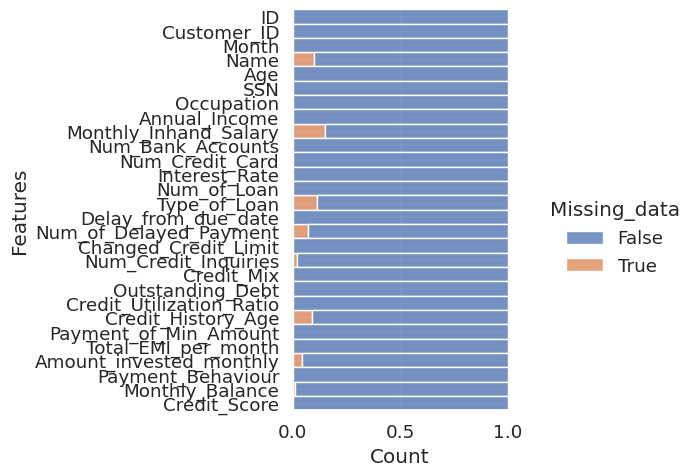

In [ ]:
def na_ratio_plot(df=df):

    sns.displot(df.isna().melt(value_name='Missing_data',var_name='Features')\
                ,y='Features',hue='Missing_data',multiple='fill',aspect=9/8)

print(df.isna().sum()[df.isna().sum()>0])
na_ratio_plot()

## Data Cleaning

#### Identify issues¶

- ID, Name and SSN (Not useful)
- Age, Annual_Income, Num_of_Loan, Num_of_Delayed_Payment, Changed_Credit_Limit, Amount_invested_monthly, Outstanding_Debt Credit_Mix, Monthly_Balance Numerical but show as catogery (need to be fixed)
- Occupation, CreditMix has value "__"
- Data contains outliers
- Num_Credit_Card has zeros
- Type_of_Loan Need to rewrite
- Num_Bank_Accounts contains negative values
- Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,'Credit_Mix' (needs Feature Engineering)
- Target Columns is Imbalanced
- A lot of missing data

In [ ]:
## Month

df['Month'].value_counts()

Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64

In [ ]:
df['Month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August'], dtype=object)

In [ ]:
dict_month = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5,
              'June':6, 'July':7, 'August':8}

df['Month'] = df['Month'].map(dict_month)

In [ ]:
## Age
def clean_age(age):
    try:
        return int(age)
    except ValueError:
        return None

df['Age'] = df['Age'].str.replace('_', '').str.replace('-', '')
df['Age'] = df['Age'].apply(clean_age)

In [ ]:
def truncate_last_two_digits(age):
    if age > 99:
        return age // 100
    else:
        return age


df['Age'] = df['Age'].apply(truncate_last_two_digits)
df['Age']

0        23
1        23
2         5
3        23
4        23
         ..
99995    25
99996    25
99997    25
99998    25
99999    25
Name: Age, Length: 100000, dtype: int64

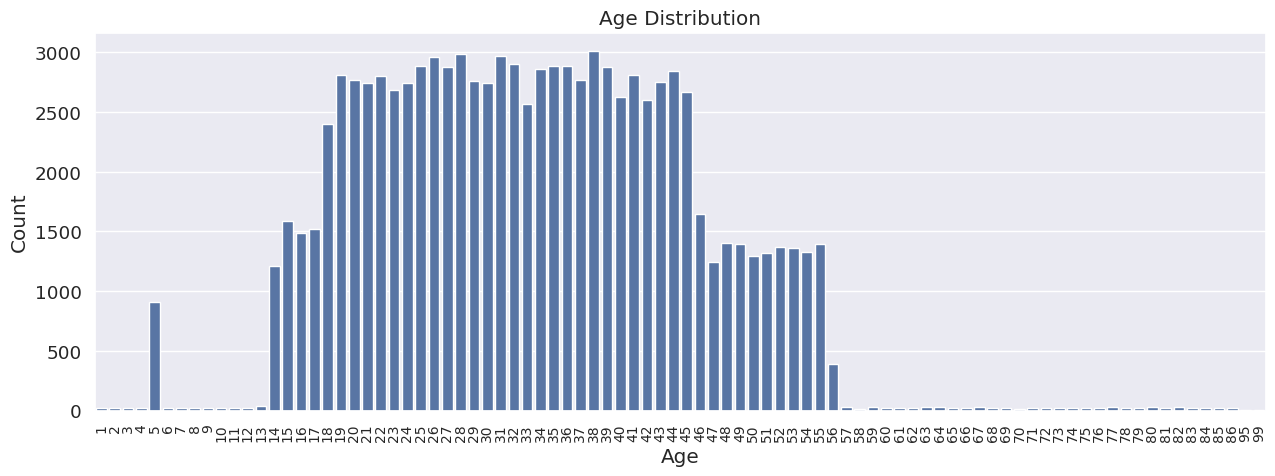

In [ ]:
plt.figure(figsize=(13, 5))
sns.countplot(x='Age', data=df)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

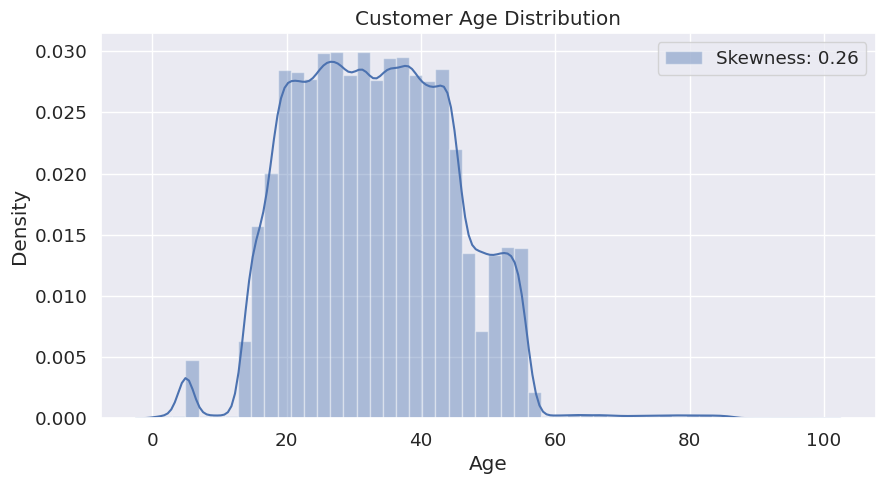

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(df['Age'], label = 'Skewness: %.2f'%(df['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Age Distribution')
plt.show()

In [ ]:
## Annual Income

# remove the tire at the end
def remove_trailing_dash(value):
    if isinstance(value, str) and value.endswith('_'):
        return value[:-1]  # Son karakteri (tireyi) kaldır
    else:
        return value


df['Annual_Income'] = df['Annual_Income'].apply(remove_trailing_dash)

In [ ]:

df['Annual_Income'] = df['Annual_Income'].astype(float)
df['Annual_Income'].unique()

array([ 19114.12,  34847.84, 143162.64, ...,  37188.1 ,  20002.88,
        39628.99])

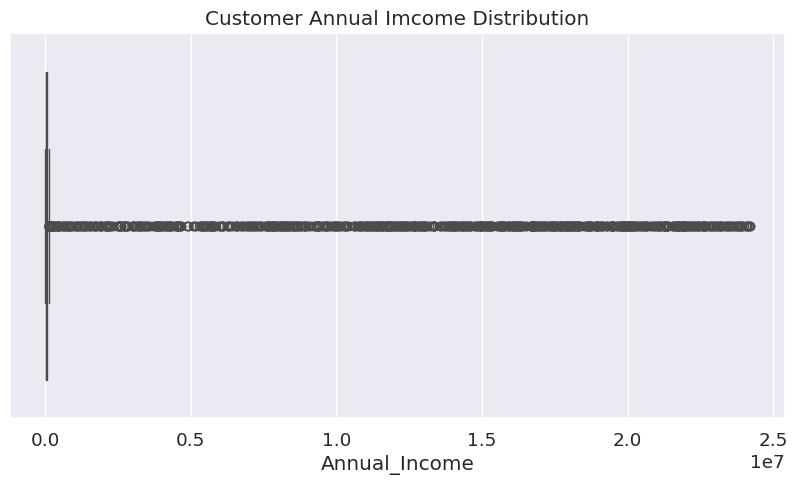

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'Annual_Income', data = df)
plt.title('Customer Annual Imcome Distribution')
plt.show()

In [ ]:
## Monthly Inhand Salary

Customer_Mode_Salary = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(lambda x : x.mode().iloc[0])
df['Monthly_Inhand_Salary'] = np.where(df['Monthly_Inhand_Salary'].isnull(), Customer_Mode_Salary, df['Monthly_Inhand_Salary'])

Text(0.5, 1.0, 'Customer Monthly Salary Distribution')

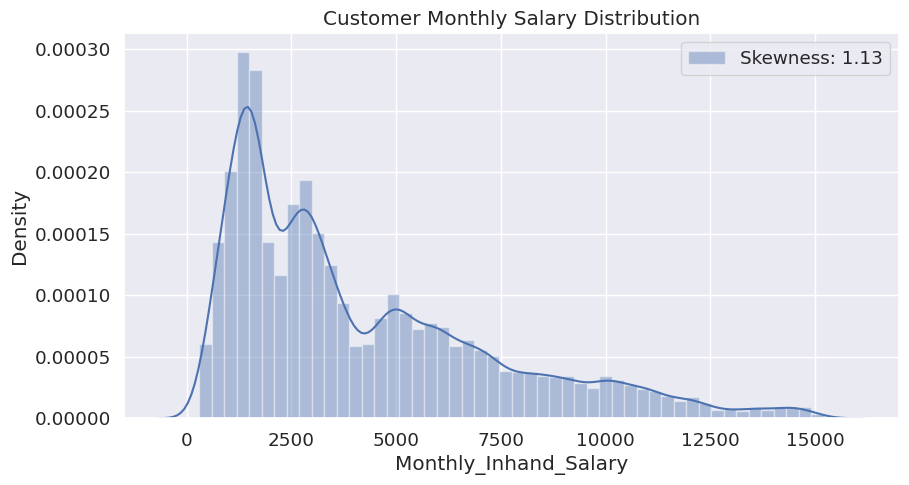

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(df['Monthly_Inhand_Salary'], label = 'Skewness: %.2f'%(df['Monthly_Inhand_Salary'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Monthly Salary Distribution')

In [ ]:
## Occupation

def fill_occupation_by_ssn(df):
    # Replace '_______' values ​​in 'Occupation' column with NaN (empty) values
    df['Occupation'] = df['Occupation'].replace('_______', np.nan)

    # Find the most recurring 'Occupation' values ​​for each SNN number
    most_common_occupation_by_ssn = df.groupby('SSN')['Occupation'].apply(lambda x: x.mode().iloc[0])

    # 'Populating '_______' values ​​in 'Occupation' column
    for index, row in df.iterrows():
        if pd.isnull(row['Occupation']) and row['SSN'] in most_common_occupation_by_ssn:
            df.at[index, 'Occupation'] = most_common_occupation_by_ssn[row['SSN']]


fill_occupation_by_ssn(df)

In [ ]:
occupation_count = df['Occupation'].value_counts()
occupation_count

Occupation
Lawyer           7489
Engineer         6837
Architect        6806
Mechanic         6752
Accountant       6717
Scientist        6713
Media_Manager    6689
Developer        6687
Teacher          6646
Entrepreneur     6621
Doctor           6537
Journalist       6502
Manager          6402
Musician         6322
Writer           6280
Name: count, dtype: int64

Text(0.5, 0, 'Occupation')

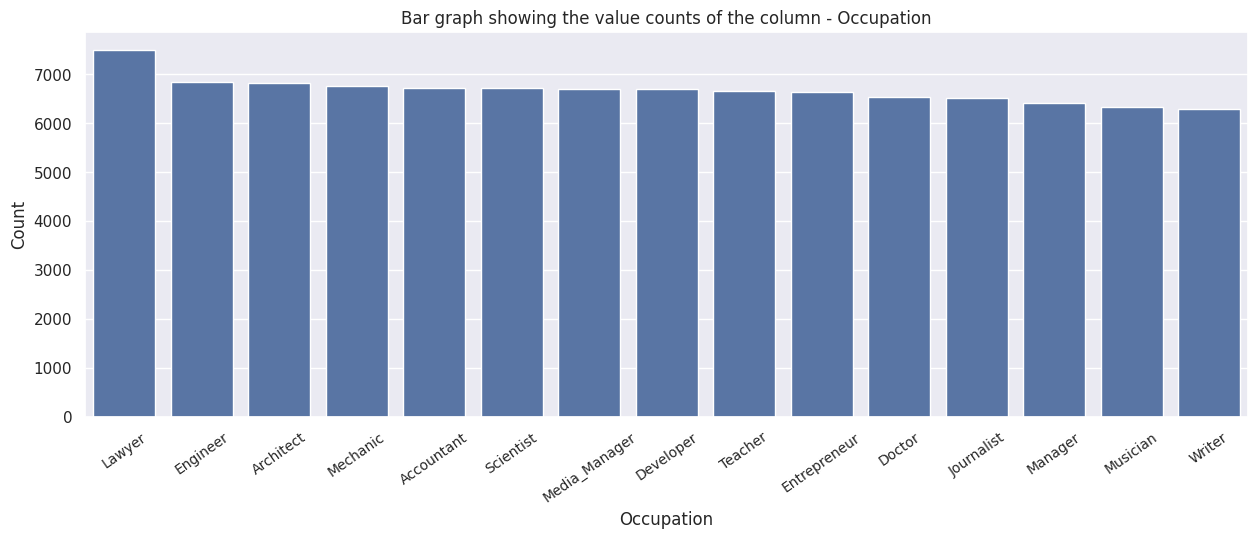

In [ ]:
# occupation_count, chart with the number of occupations in the Occupation column
plt.figure(figsize=(15,5))
sns.set(rc={'figure.figsize': (10, 5)})
sns.barplot(x=occupation_count.index, y=occupation_count.values)
plt.title('Bar graph showing the value counts of the column - Occupation')
plt.xticks(rotation=35, fontsize=10)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Occupation', fontsize=12)

<Figure size 1500x1000 with 0 Axes>

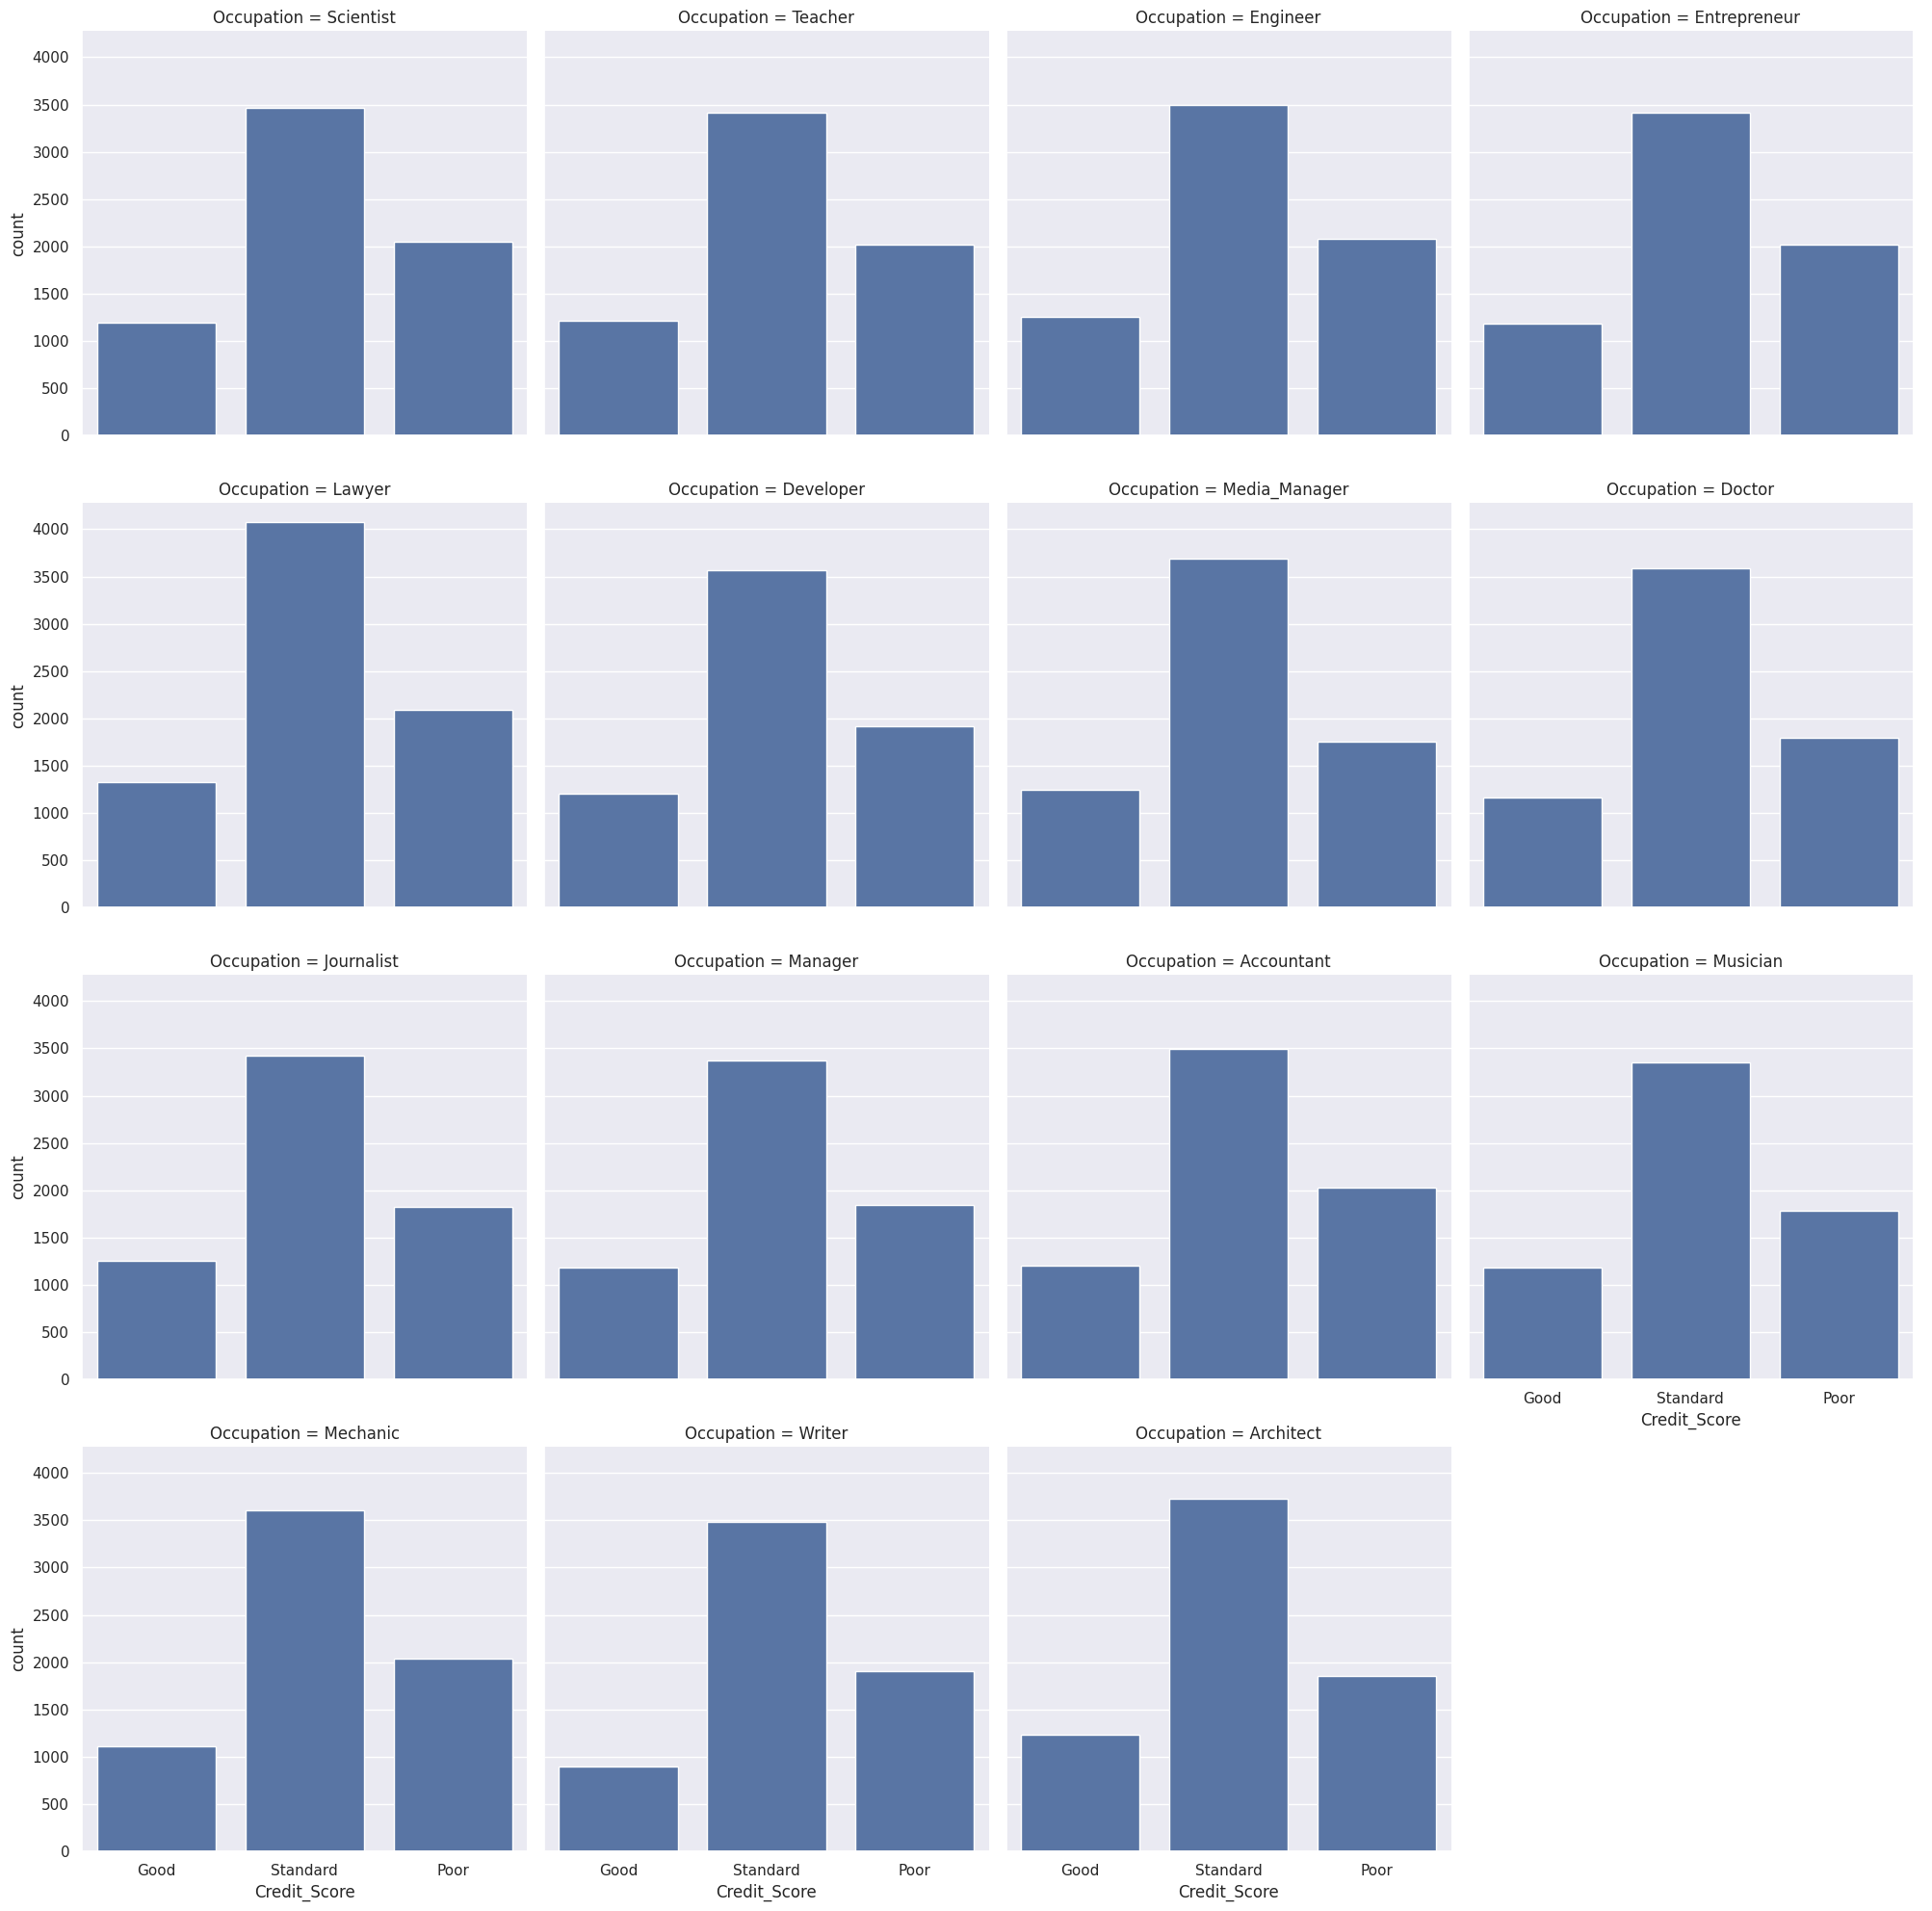

In [ ]:
plt.figure(figsize=(15,10))
sns.catplot(x='Credit_Score', col='Occupation', data=df, kind='count', col_wrap=4)

plt.tight_layout()
plt.show()

In [ ]:
## Number of Personal Loan

df['Num_of_Loan'].unique()

array(['4', '1', '3', '967', '-100', '0', '0_', '2', '3_', '2_', '7', '5',
       '5_', '6', '8', '8_', '9', '9_', '4_', '7_', '1_', '1464', '6_',
       '622', '352', '472', '1017', '945', '146', '563', '341', '444',
       '720', '1485', '49', '737', '1106', '466', '728', '313', '843',
       '597_', '617', '119', '663', '640', '92_', '1019', '501', '1302',
       '39', '716', '848', '931', '1214', '186', '424', '1001', '1110',
       '1152', '457', '1433', '1187', '52', '1480', '1047', '1035',
       '1347_', '33', '193', '699', '329', '1451', '484', '132', '649',
       '995', '545', '684', '1135', '1094', '1204', '654', '58', '348',
       '614', '1363', '323', '1406', '1348', '430', '153', '1461', '905',
       '1312', '1424', '1154', '95', '1353', '1228', '819', '1006', '795',
       '359', '1209', '590', '696', '1185_', '1465', '911', '1181', '70',
       '816', '1369', '143', '1416', '455', '55', '1096', '1474', '420',
       '1131', '904', '89', '1259', '527', '1241', '449', 

In [ ]:
# Function to remove "-" and "_" characters
def clean_num(num):
    num = num.strip("-_")
    if num == "100":
        return np.nan
    elif len(num) > 1:
        return num[0]
    else:
        return num


df["Num_of_Loan"] = df["Num_of_Loan"].apply(clean_num)


most_common_value = df["Num_of_Loan"].mode()[0]
df["Num_of_Loan"] = df["Num_of_Loan"].fillna(most_common_value)

In [ ]:
df['Num_of_Loan'].value_counts()

Num_of_Loan
3    19016
2    15076
4    14776
0    10930
1    10800
6     7839
7     7368
5     7231
9     3736
8     3228
Name: count, dtype: int64

In [ ]:
df.Num_of_Loan.isnull().sum()

0

In [ ]:
## Type of Loan
df['Type_of_Loan'].fillna('Unknown', inplace=True)

In [ ]:
df['Type_of_Loan'].value_counts()

Type_of_Loan
Unknown                                                                                                                               11408
Not Specified                                                                                                                          1408
Credit-Builder Loan                                                                                                                    1280
Personal Loan                                                                                                                          1272
Debt Consolidation Loan                                                                                                                1264
                                                                                                                                      ...  
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                  8
Payday 

In [ ]:
loan_type_groups = df.groupby('Type_of_Loan').size()
print(loan_type_groups)

Type_of_Loan
Auto Loan                                                                                                                                    1152
Auto Loan, Auto Loan, Auto Loan, Auto Loan, Credit-Builder Loan, Credit-Builder Loan, Mortgage Loan, and Personal Loan                          8
Auto Loan, Auto Loan, Auto Loan, Auto Loan, Student Loan, and Student Loan                                                                      8
Auto Loan, Auto Loan, Auto Loan, Credit-Builder Loan, Payday Loan, Not Specified, Payday Loan, Student Loan, and Debt Consolidation Loan        8
Auto Loan, Auto Loan, Auto Loan, Not Specified, Debt Consolidation Loan, and Credit-Builder Loan                                                8
                                                                                                                                            ...  
Student Loan, and Not Specified                                                                                

In [ ]:
## Number of Delayed Payment
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna('0')

In [ ]:
def remove_special_characters(value):
    if isinstance(value, str):

        value = value.strip('_').strip('-')
    return value

In [ ]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(remove_special_characters)

In [ ]:
## Change Credit Limit
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('-', np.nan)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('_', np.nan)


df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce')


mean_value = df['Changed_Credit_Limit'].mean()


df['Changed_Credit_Limit'].fillna(mean_value, inplace=True)

In [ ]:
##Number of Credit Inquiries
df['Num_Credit_Inquiries'].unique()

array([   4.,    2.,    3., ..., 1361.,  310.,   74.])

In [ ]:
df['Num_Credit_Inquiries'].fillna(0, inplace=True)

In [ ]:
## Credit Mix
credit_mix_count = df['Credit_Mix'].value_counts()
credit_mix_count

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

In [ ]:
df['Credit_Mix'] = df['Credit_Mix'].replace('_', np.nan)

def fill_na_cat(data, val):

    for col in data.select_dtypes(include='object').columns:
        mode_by_customer = data.groupby('Customer_ID')[col].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
        mode_global = data[col].mode()[0]
        data[col] = data[col].fillna(mode_by_customer.fillna(mode_global))
    return data

df = fill_na_cat(data=df, val="Credit_Mix")

In [ ]:

credit_mix_count = df['Credit_Mix'].value_counts()
credit_mix_count

Credit_Mix
Standard    45848
Good        30384
Bad         23768
Name: count, dtype: int64

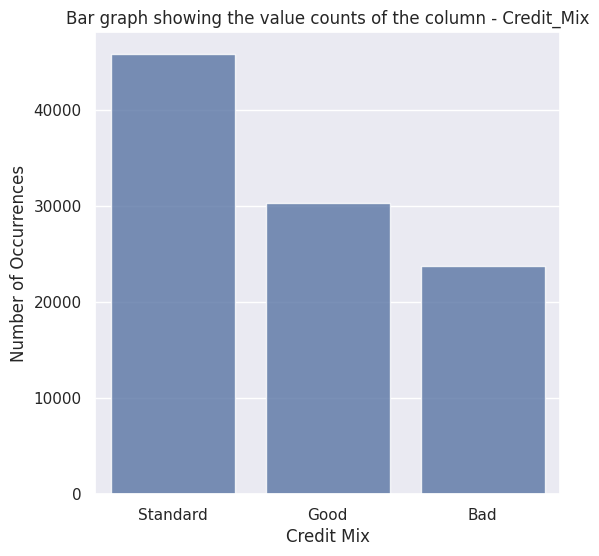

In [ ]:

# Bar graph showing the value counts of the column - Credit_Mix

sns.set(rc={'figure.figsize': (6, 6)})
sns.barplot(x=credit_mix_count.index, y=credit_mix_count.values, alpha=0.8)
plt.title('Bar graph showing the value counts of the column - Credit_Mix')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Credit Mix', fontsize=12)
plt.show()

In [ ]:
## Credit History Age

# Covert Credit_History_Age to month
def parse_years_and_months_to_months(age):
    if isinstance(age, str):
        age_parts = age.split(' Years and ')
        years = int(age_parts[0]) if 'Years' in age else 0
        months_str = age_parts[1].split(' Months')[0] if 'Months' in age_parts[1] else '0'
        months = int(months_str)
        total_months = years * 12 + months
        return total_months
    else:
        return 0


df['Credit_History_Age_Months'] = df['Credit_History_Age'].apply(parse_years_and_months_to_months)

In [ ]:
df.drop(columns=['Credit_History_Age'], inplace=True)

In [ ]:
## Amount Invest Monthly
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].replace(
    '__10000__', np.nan)

df['Amount_invested_monthly'] = df.groupby(
    'Customer_ID')['Amount_invested_monthly'].transform(
        lambda x: x.mode()[0] if not x.mode().empty else np.NaN)

In [ ]:
df['Amount_invested_monthly'].isnull().sum()

0

In [ ]:
## Monthly Balance
df['Monthly_Balance'].value_counts()

Monthly_Balance
__-333333333333333333333333333__    9
239.59620527100063                  6
212.44492522535438                  5
128.54140433011784                  5
244.99107777431962                  5
                                   ..
658.9412372133265                   1
1072.867912409617                   1
740.0418087099729                   1
1279.6106996658787                  1
393.6736955618808                   1
Name: count, Length: 98792, dtype: int64

In [ ]:

df['Monthly_Balance'] = df['Monthly_Balance'].astype(str)

df['Monthly_Balance'] = df['Monthly_Balance'].str.replace(r'[^0-9.-]+', '').str.replace('_', '').str.replace('-', '')

In [ ]:
df['Monthly_Balance'] = df['Monthly_Balance'].astype(float)

mean_value = df['Monthly_Balance'].mean()

df['Monthly_Balance'].fillna(mean_value, inplace=True)

In [ ]:
df['Monthly_Balance'].value_counts()

Monthly_Balance
3.333333e+26    9
2.395962e+02    6
2.124449e+02    5
1.285414e+02    5
2.449911e+02    5
               ..
6.589412e+02    1
1.072868e+03    1
7.400418e+02    1
1.279611e+03    1
3.936737e+02    1
Name: count, Length: 98792, dtype: int64

In [ ]:
### Payment Behavior
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('!@9#%8', np.nan)

In [ ]:
df['Payment_Behaviour'].isna().sum()

7600

In [ ]:
# Group data by 'Payment Behaviour' column
grouped_df = df.groupby('Payment_Behaviour').size()

print(grouped_df)

Payment_Behaviour
High_spent_Large_value_payments     13721
High_spent_Medium_value_payments    17540
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Low_spent_Medium_value_payments     13861
Low_spent_Small_value_payments      25513
dtype: int64


In [ ]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].fillna(method='ffill')

In [ ]:

df['Payment_Behaviour'].isna().sum()

0

In [ ]:
grouped_df = df.groupby('Payment_Behaviour').size()

print(grouped_df)

Payment_Behaviour
High_spent_Large_value_payments     14863
High_spent_Medium_value_payments    19010
High_spent_Small_value_payments     12250
Low_spent_Large_value_payments      11297
Low_spent_Medium_value_payments     14987
Low_spent_Small_value_payments      27593
dtype: int64


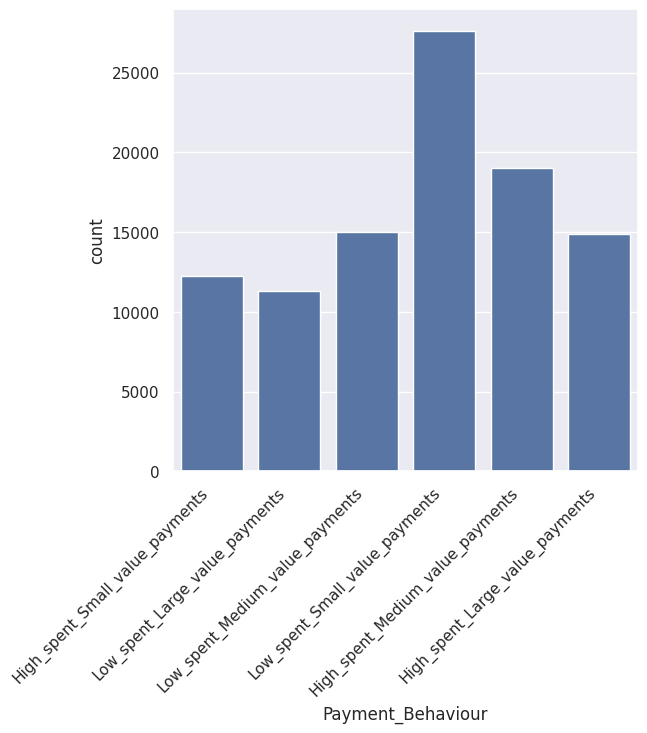

In [ ]:
plot = sns.countplot(x='Payment_Behaviour', data=df)

plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')

plt.show()

In [ ]:
### Payment of Min Amount

min_amount_count = df['Payment_of_Min_Amount'].value_counts()
min_amount_count

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

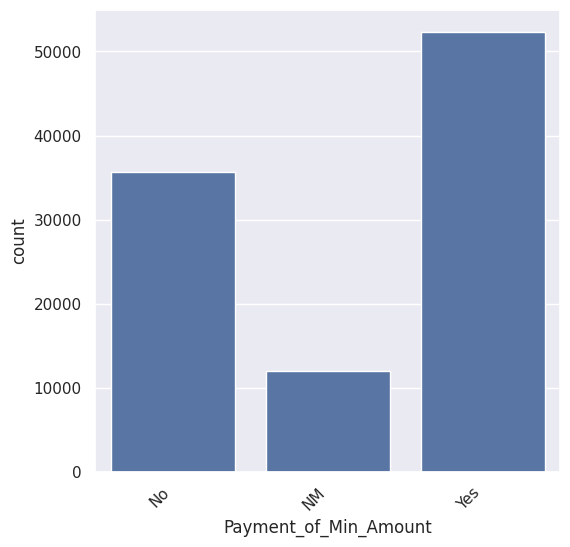

In [ ]:

plot = sns.countplot(x='Payment_of_Min_Amount', data=df)

plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')  # ha='right' ile etiketlerin hizalanması sağlanır

plt.show()

In [ ]:
## Interest Rate

df['Interest_Rate'] = df['Interest_Rate'].astype(float)

In [ ]:
df.Interest_Rate.value_counts()

Interest_Rate
8.0       5012
5.0       4979
6.0       4721
12.0      4540
10.0      4540
          ... 
4995.0       1
1899.0       1
2120.0       1
5762.0       1
5729.0       1
Name: count, Length: 1750, dtype: int64

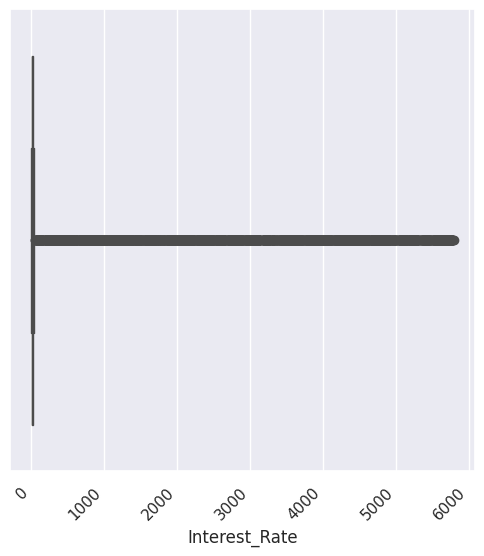

In [ ]:
plot = sns.boxplot(x='Interest_Rate', data=df)

plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')

plt.show()

In [ ]:
'''def truncate_Interest_Rate_digits(interest):
    if interest > 1000:
        return interest // 1000
    elif interest > 100:
        return interest // 100
    else:
        return interest


df['Interest_Rate'] = df['Interest_Rate'].apply(truncate_Interest_Rate_digits)
df['Interest_Rate']'''

"def truncate_Interest_Rate_digits(interest):\n    if interest > 1000:\n        return interest // 1000\n    elif interest > 100:\n        return interest // 100\n    else:\n        return interest\n\n\ndf['Interest_Rate'] = df['Interest_Rate'].apply(truncate_Interest_Rate_digits)\ndf['Interest_Rate']"

In [ ]:
int_low = df[df['Interest_Rate'] <= 100]

<Axes: xlabel='Interest_Rate', ylabel='count'>

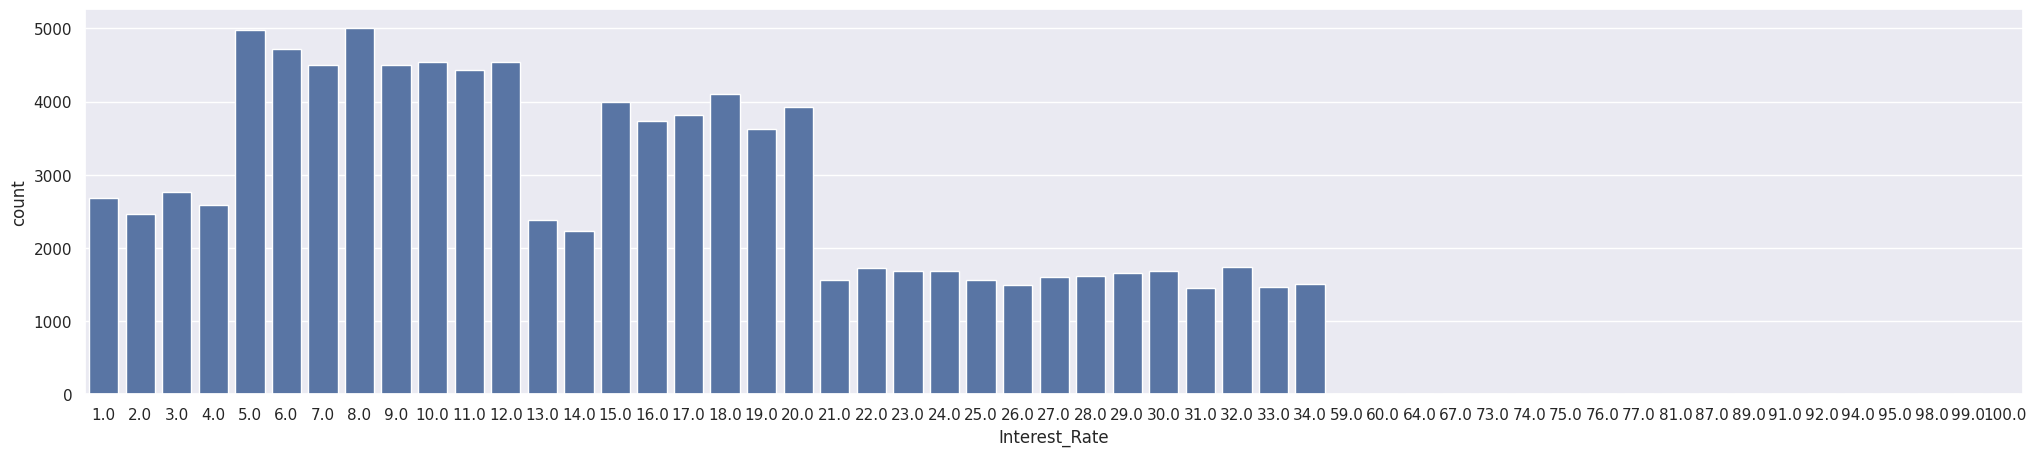

In [ ]:
plt.figure(figsize=(25,5))
sns.countplot(data=int_low , x='Interest_Rate')

In [ ]:
int_low['Interest_Rate'].value_counts()

Interest_Rate
8.0      5012
5.0      4979
6.0      4721
10.0     4540
12.0     4540
7.0      4494
9.0      4494
11.0     4428
18.0     4102
15.0     3992
20.0     3929
17.0     3813
16.0     3730
19.0     3630
3.0      2765
1.0      2683
4.0      2589
2.0      2465
13.0     2384
14.0     2229
32.0     1742
22.0     1720
30.0     1690
24.0     1685
23.0     1683
29.0     1662
28.0     1616
27.0     1608
25.0     1566
21.0     1560
34.0     1502
26.0     1489
33.0     1467
31.0     1457
95.0        2
75.0        2
76.0        2
94.0        1
60.0        1
99.0        1
77.0        1
98.0        1
100.0       1
64.0        1
81.0        1
91.0        1
74.0        1
73.0        1
89.0        1
59.0        1
87.0        1
67.0        1
92.0        1
Name: count, dtype: int64

In [ ]:
int_high = df[df['Interest_Rate'] > 100]

<Axes: xlabel='Interest_Rate'>

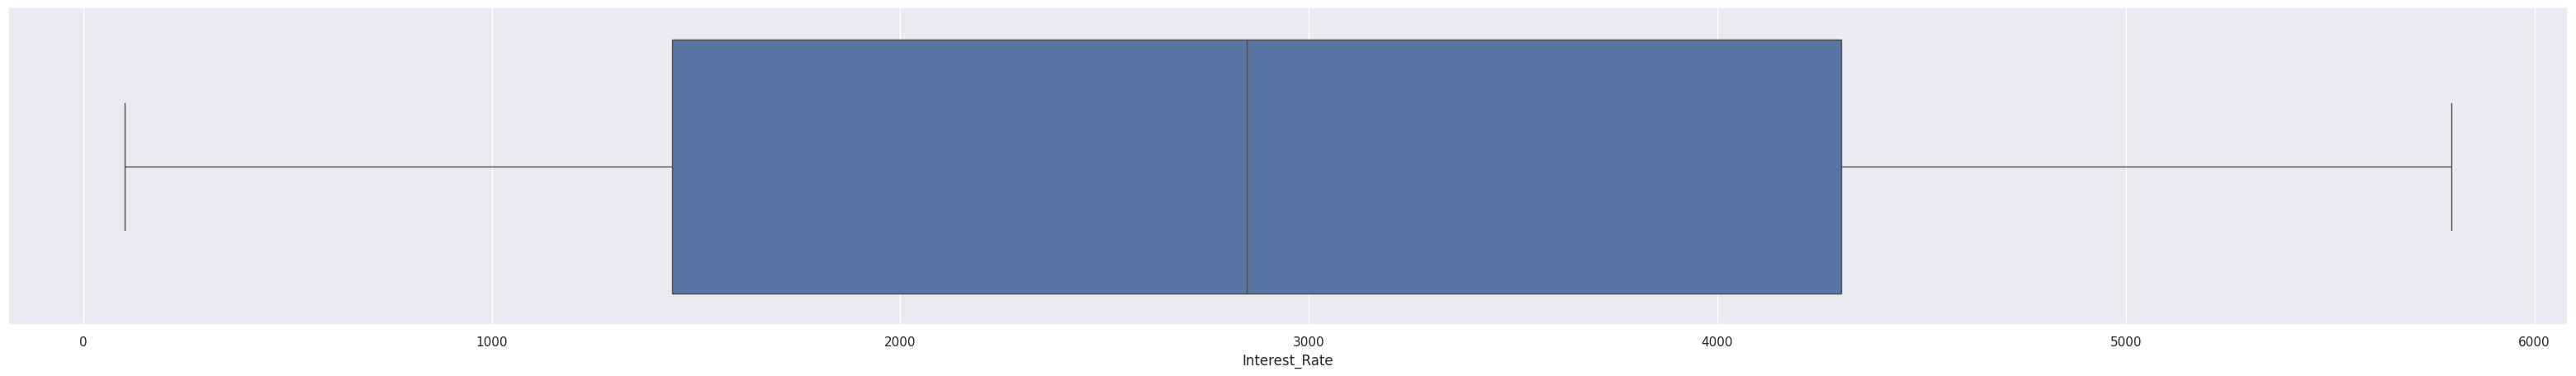

In [ ]:
plt.figure(figsize=(40,5))
sns.boxplot(data=int_high , x='Interest_Rate')

In [ ]:
int_high['Interest_Rate'].describe()

count    2012.000000
mean     2893.242545
std      1640.100091
min       101.000000
25%      1441.250000
50%      2848.000000
75%      4303.500000
max      5797.000000
Name: Interest_Rate, dtype: float64

In [ ]:
int_high['Interest_Rate'].value_counts()

Interest_Rate
498.0     4
4676.0    4
1944.0    4
3089.0    4
3672.0    3
         ..
4995.0    1
1899.0    1
2120.0    1
5762.0    1
5729.0    1
Name: count, Length: 1697, dtype: int64

In [ ]:
def truncate_Interest_Rate_digits(interest):
    if interest > 5000:
        return interest // 1000
    elif interest > 1000:
        return interest // 100
    elif interest > 500:
        return interest // 100
    elif interest > 100:
        return interest // 10
    else:
        return interest


df['Interest_Rate'] = df['Interest_Rate'].apply(truncate_Interest_Rate_digits)
df['Interest_Rate']

0        3.0
1        3.0
2        3.0
3        3.0
4        3.0
        ... 
99995    7.0
99996    7.0
99997    5.0
99998    7.0
99999    7.0
Name: Interest_Rate, Length: 100000, dtype: float64

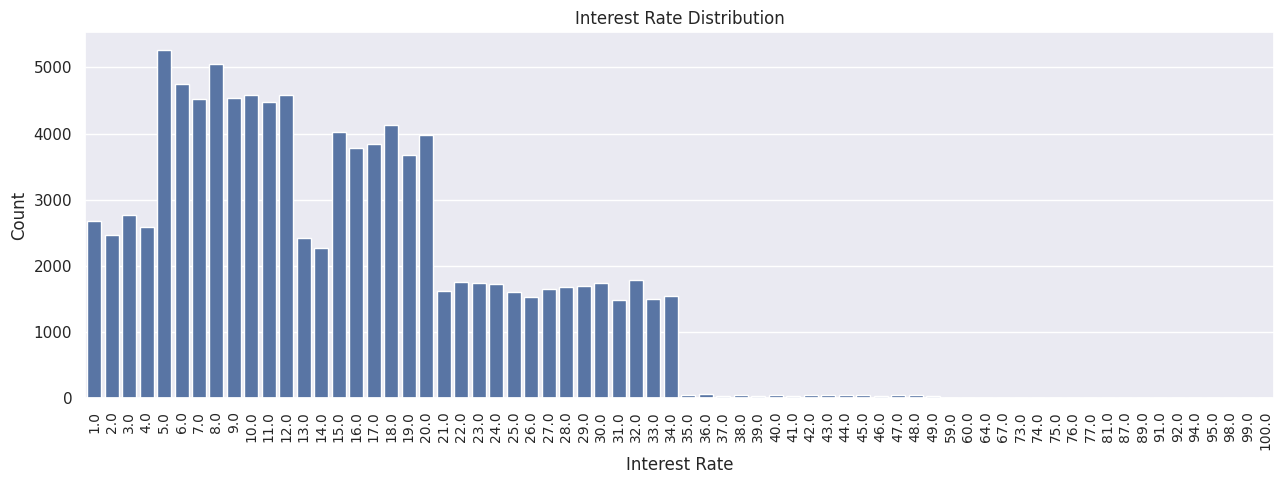

In [ ]:
plt.figure(figsize=(13, 5))
sns.countplot(x='Interest_Rate', data=df)
plt.title('Interest Rate Distribution')
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
## Drop Unnecessary Column
df.drop(['ID','Customer_ID', 'Month', 'Name','SSN', 'Type_of_Loan'], axis = 1, inplace = True)

Series([], dtype: int64)


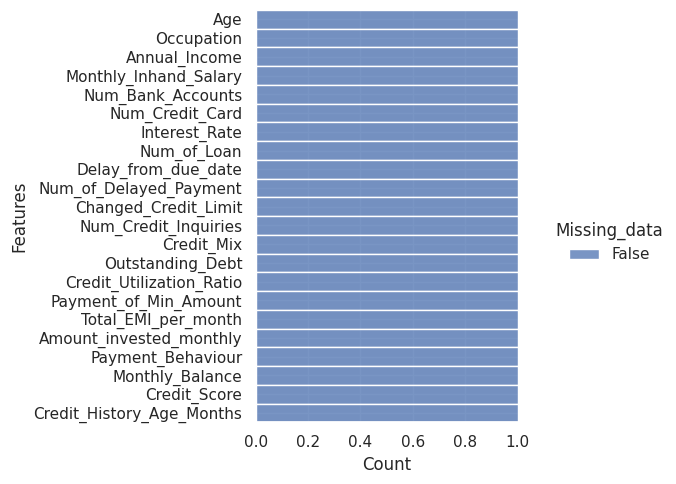

In [ ]:
## Check Missing Value

print(df.isna().sum()[df.isna().sum()>0])
na_ratio_plot()

In [ ]:
## Convert numeric columns

df.dtypes

Age                            int64
Occupation                    object
Annual_Income                float64
Monthly_Inhand_Salary        float64
Num_Bank_Accounts              int64
Num_Credit_Card                int64
Interest_Rate                float64
Num_of_Loan                   object
Delay_from_due_date            int64
Num_of_Delayed_Payment        object
Changed_Credit_Limit         float64
Num_Credit_Inquiries         float64
Credit_Mix                    object
Outstanding_Debt              object
Credit_Utilization_Ratio     float64
Payment_of_Min_Amount         object
Total_EMI_per_month          float64
Amount_invested_monthly       object
Payment_Behaviour             object
Monthly_Balance              float64
Credit_Score                  object
Credit_History_Age_Months      int64
dtype: object

In [ ]:
columns_to_convert = ['Num_of_Delayed_Payment', 'Outstanding_Debt', 'Amount_invested_monthly','Num_of_Loan']
for col in columns_to_convert:
    df[col] = df[col].str.replace('_', '').astype(float)

In [ ]:
df.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
0,23,Scientist,19114.12,1824.843333,3,4,3.0,4.0,3,7.0,...,Good,809.98,26.822620,No,49.574949,118.280222,High_spent_Small_value_payments,312.494089,Good,265
1,23,Scientist,19114.12,1824.843333,3,4,3.0,4.0,-1,0.0,...,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,265
2,5,Scientist,19114.12,1824.843333,3,4,3.0,4.0,3,7.0,...,Good,809.98,28.609352,No,49.574949,118.280222,Low_spent_Medium_value_payments,331.209863,Good,267
3,23,Scientist,19114.12,1824.843333,3,4,3.0,4.0,5,4.0,...,Good,809.98,31.377862,No,49.574949,118.280222,Low_spent_Small_value_payments,223.451310,Good,268
4,23,Scientist,19114.12,1824.843333,3,4,3.0,4.0,6,0.0,...,Good,809.98,24.797347,No,49.574949,118.280222,High_spent_Medium_value_payments,341.489231,Good,269


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Age                        100000 non-null  int64  
 1   Occupation                 100000 non-null  object 
 2   Annual_Income              100000 non-null  float64
 3   Monthly_Inhand_Salary      100000 non-null  float64
 4   Num_Bank_Accounts          100000 non-null  int64  
 5   Num_Credit_Card            100000 non-null  int64  
 6   Interest_Rate              100000 non-null  float64
 7   Num_of_Loan                100000 non-null  float64
 8   Delay_from_due_date        100000 non-null  int64  
 9   Num_of_Delayed_Payment     100000 non-null  float64
 10  Changed_Credit_Limit       100000 non-null  float64
 11  Num_Credit_Inquiries       100000 non-null  float64
 12  Credit_Mix                 100000 non-null  object 
 13  Outstanding_Debt           100

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,3.325899e+01,1.156256e+01,1.000000,24.000000,33.000000,42.000000,9.900000e+01
Annual_Income,100000.0,1.764157e+05,1.429618e+06,7005.930000,19457.500000,37578.610000,72790.920000,2.419806e+07
Monthly_Inhand_Salary,100000.0,4.198351e+03,3.187402e+03,303.645417,1626.761667,3095.978333,5961.637500,1.520463e+04
Num_Bank_Accounts,100000.0,1.709128e+01,1.174048e+02,-1.000000,3.000000,6.000000,7.000000,1.798000e+03
Num_Credit_Card,100000.0,2.247443e+01,1.290574e+02,0.000000,4.000000,5.000000,7.000000,1.499000e+03
Interest_Rate,100000.0,1.474284e+01,9.040753e+00,1.000000,7.000000,13.000000,20.000000,1.000000e+02
Num_of_Loan,100000.0,3.513170e+00,2.403440e+00,0.000000,2.000000,3.000000,5.000000,9.000000e+00
Delay_from_due_date,100000.0,2.106878e+01,1.486010e+01,-5.000000,10.000000,18.000000,28.000000,6.700000e+01
Num_of_Delayed_Payment,100000.0,2.877941e+01,2.181148e+02,0.000000,8.000000,13.000000,18.000000,4.397000e+03
Changed_Credit_Limit,100000.0,1.038903e+01,6.718136e+00,-6.490000,5.420000,9.560000,14.660000,3.697000e+01


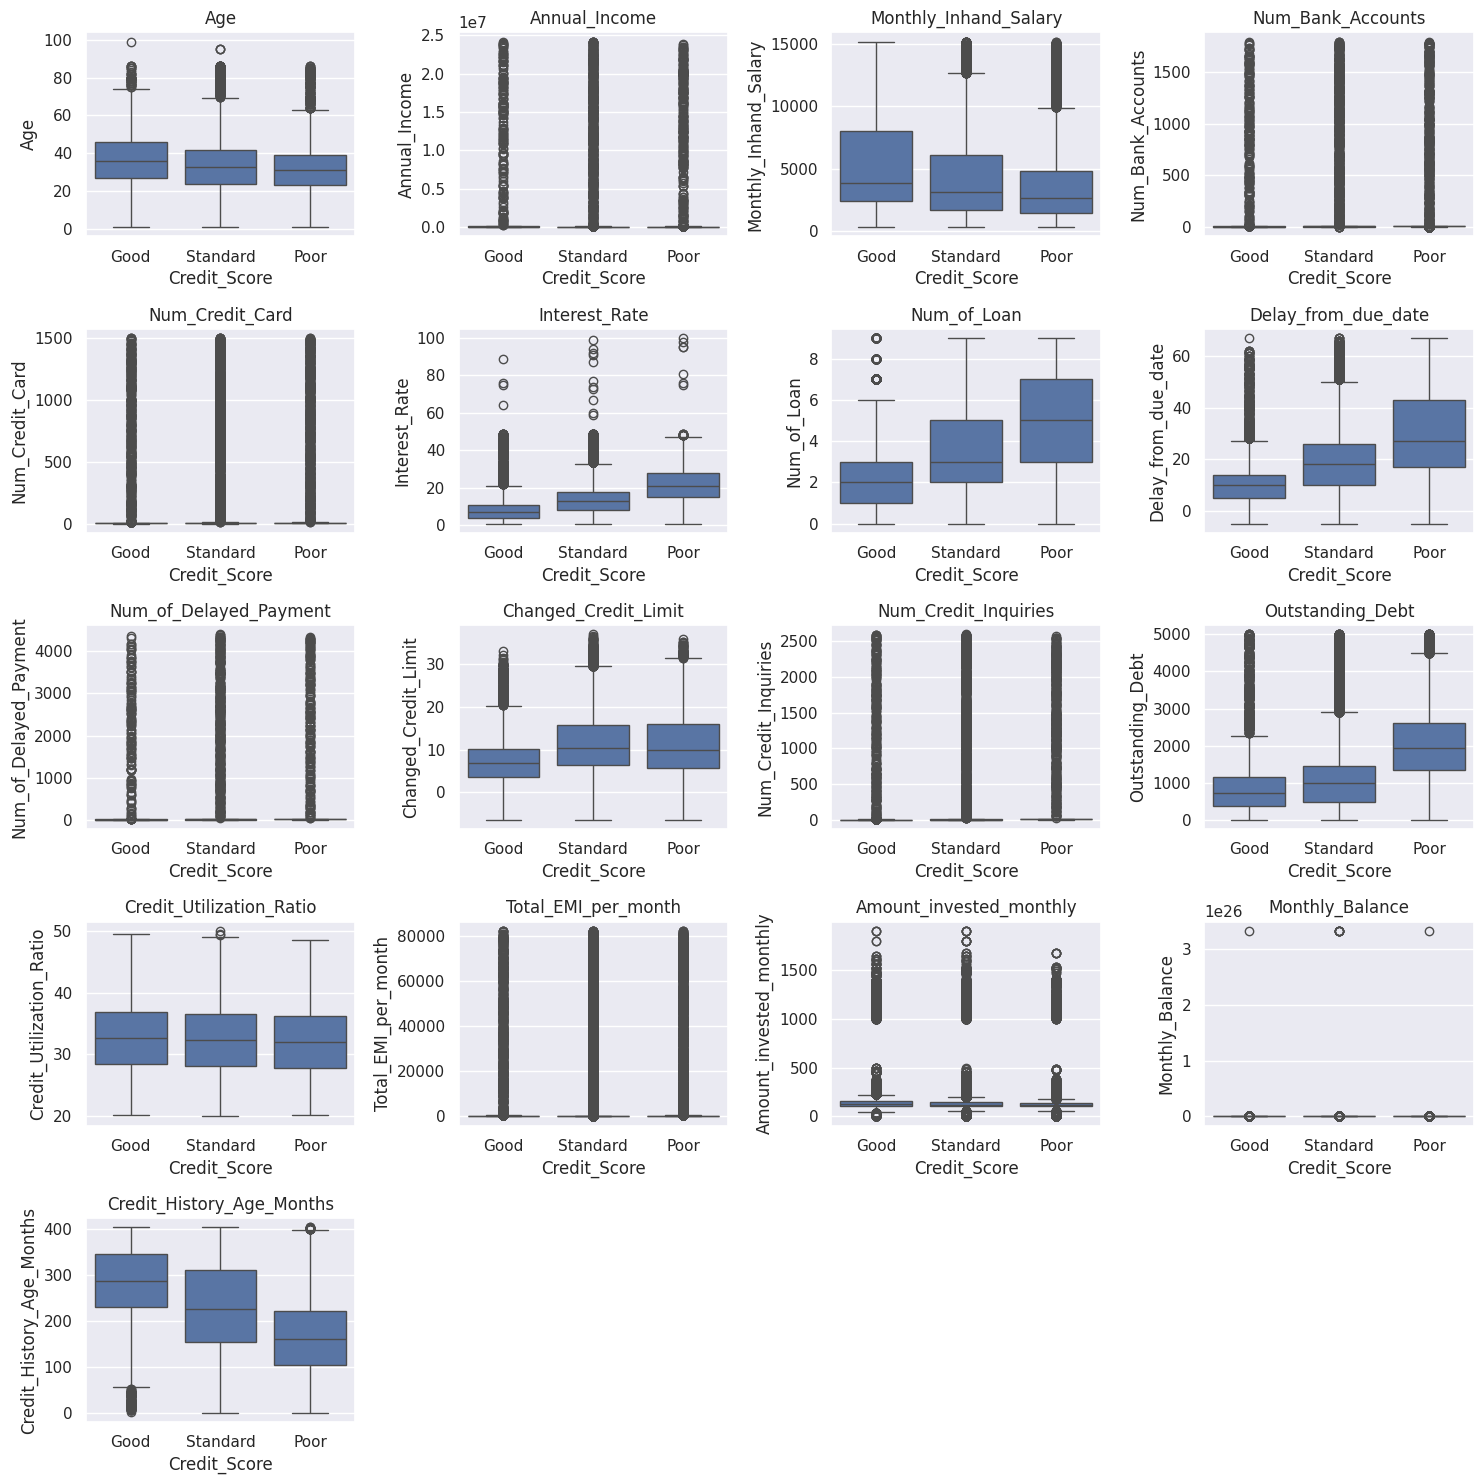

In [ ]:
df_numeric_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

plt.figure(figsize=(15,15))
for i, col in enumerate(df_numeric_cols):
    plt.subplot(5, 4, i+1)
    sns.boxplot(x='Credit_Score', y=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()


## Remove Outlier

In [ ]:
df.shape

(100000, 22)

In [ ]:
# outlier deletion
df_num = df.select_dtypes(include='number')
for column in df_num.columns:
    for i in df["Credit_Score"].unique():
        selected_i = df[df["Credit_Score"] == i]
        selected_column = selected_i[column]

        std = selected_column.std()
        mean= selected_column.mean()

        max = mean + (4 * std)
        min =  mean - (4 * std)

        outliers = selected_column[((selected_i[column] > max) | (selected_i[column] < min))].index
        df.drop(index=outliers, inplace=True)
        print(column, i, outliers)

Age Good Index([6005, 10438, 23704, 28718, 31217, 34967, 61535, 84261], dtype='int64')
Age Standard Index([ 1654,  5055,  8549,  8788, 10431, 11190, 13372, 14671, 15641, 17916,
       18578, 21195, 21800, 23121, 24634, 25095, 29174, 33864, 34517, 35557,
       36575, 37904, 38248, 40478, 40483, 43149, 45669, 45931, 46755, 48897,
       50233, 52065, 53434, 55609, 56864, 57307, 57513, 59143, 60190, 60625,
       61040, 61509, 63018, 63815, 63983, 64001, 64179, 64436, 65223, 65420,
       66068, 66153, 67401, 67579, 68122, 68166, 68946, 71215, 71542, 71732,
       72205, 72375, 74040, 75531, 77053, 78564, 81562, 81593, 82335, 84621,
       85741, 86769, 87236, 87755, 89933, 94475, 94945, 95620, 96689, 99512,
       99776],
      dtype='int64')
Age Poor Index([   56,  2102,  2902,  4520,  4777,  6532,  6684,  8726,  9532,  9707,
       10247, 10858, 11527, 12940, 14747, 17467, 17547, 18362, 18585, 19783,
       21069, 21498, 21502, 22277, 22612, 24730, 25769, 26550, 30084, 31459,
       3

In [ ]:
df.shape

(89973, 22)

## Data Preprocessing

In [ ]:
df.Credit_Score.value_counts()

Credit_Score
Standard    47388
Poor        26429
Good        16156
Name: count, dtype: int64

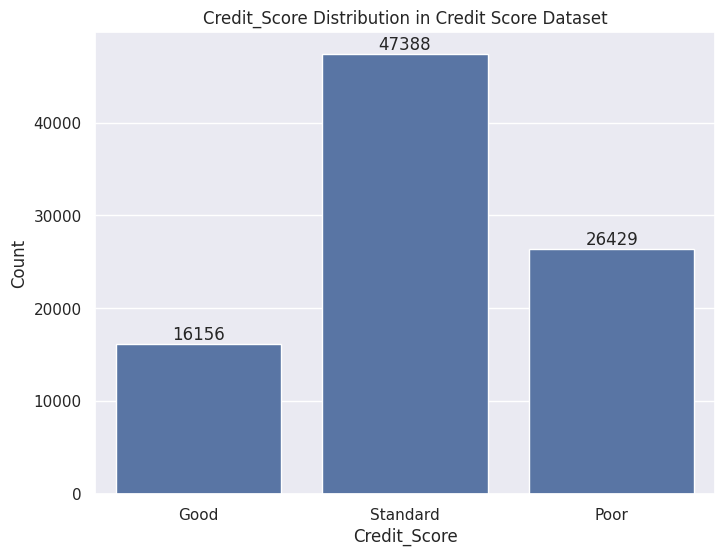

In [ ]:

# Distribution of target variable

plt.figure(figsize=(8, 6))
ax=sns.countplot(data=df, x='Credit_Score')
ax.bar_label(ax.containers[0])
plt.title('Credit_Score Distribution in Credit Score Dataset')
plt.xlabel('Credit_Score')
plt.ylabel('Count')
plt.show()

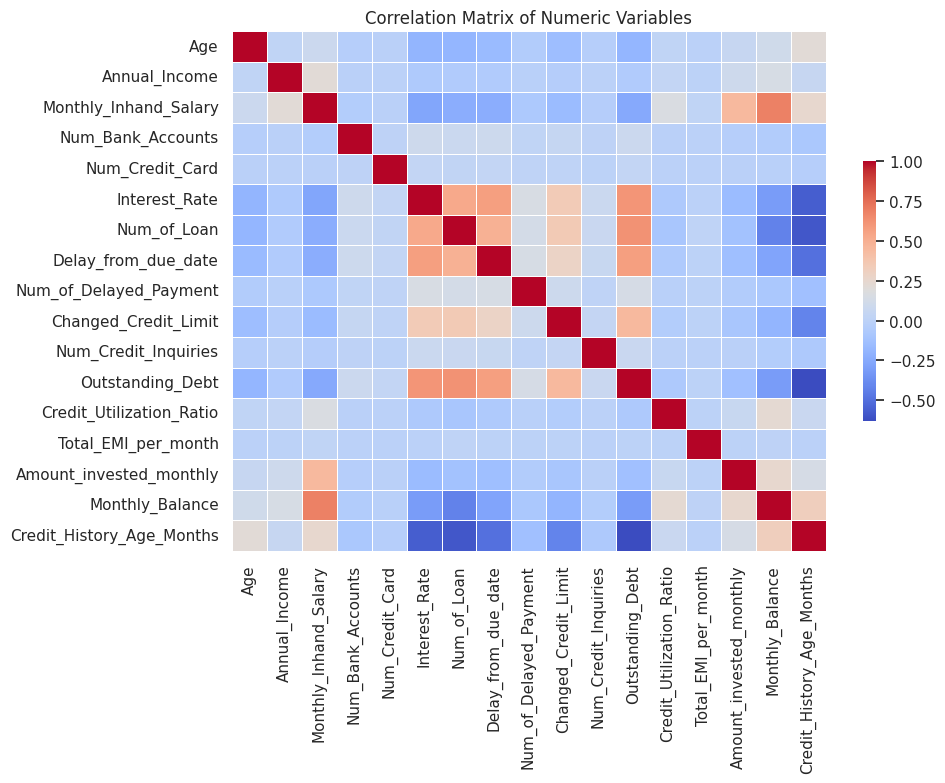

In [ ]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm", fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()

In [ ]:
## Save df to CSV file
df.to_csv("CreditScoreClassification_cleaned_outlier1.csv", index=False)

In [ ]:
df = pd.read_csv('CreditScoreClassification_cleaned_outlier1.csv')
#df = pd.read_csv('/kaggle/working/Creditscore_train_cleaned.csv')
df.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
0,23,Scientist,19114.12,1824.843333,3,4,3.0,4.0,3,7.0,...,Good,809.98,26.822620,No,49.574949,118.280222,High_spent_Small_value_payments,312.494089,Good,265
1,23,Scientist,19114.12,1824.843333,3,4,3.0,4.0,-1,0.0,...,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,265
2,5,Scientist,19114.12,1824.843333,3,4,3.0,4.0,3,7.0,...,Good,809.98,28.609352,No,49.574949,118.280222,Low_spent_Medium_value_payments,331.209863,Good,267
3,23,Scientist,19114.12,1824.843333,3,4,3.0,4.0,5,4.0,...,Good,809.98,31.377862,No,49.574949,118.280222,Low_spent_Small_value_payments,223.451310,Good,268
4,23,Scientist,19114.12,1824.843333,3,4,3.0,4.0,6,0.0,...,Good,809.98,24.797347,No,49.574949,118.280222,High_spent_Medium_value_payments,341.489231,Good,269


In [ ]:
df.isnull().sum()

Age                          0
Occupation                   0
Annual_Income                0
Monthly_Inhand_Salary        0
Num_Bank_Accounts            0
Num_Credit_Card              0
Interest_Rate                0
Num_of_Loan                  0
Delay_from_due_date          0
Num_of_Delayed_Payment       0
Changed_Credit_Limit         0
Num_Credit_Inquiries         0
Credit_Mix                   0
Outstanding_Debt             0
Credit_Utilization_Ratio     0
Payment_of_Min_Amount        0
Total_EMI_per_month          0
Amount_invested_monthly      0
Payment_Behaviour            0
Monthly_Balance              0
Credit_Score                 0
Credit_History_Age_Months    0
dtype: int64

In [ ]:

df.shape

(89973, 22)

In [ ]:
## LabelEncoding for output column
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
df["Credit_Score"] = LabelEncoder().fit_transform(df["Credit_Score"])
df["Credit_Score"]

0        0
1        0
2        0
3        0
4        0
        ..
89968    1
89969    1
89970    1
89971    2
89972    1
Name: Credit_Score, Length: 89973, dtype: int64

In [ ]:
df["Credit_Score"].value_counts()

Credit_Score
2    47388
1    26429
0    16156
Name: count, dtype: int64

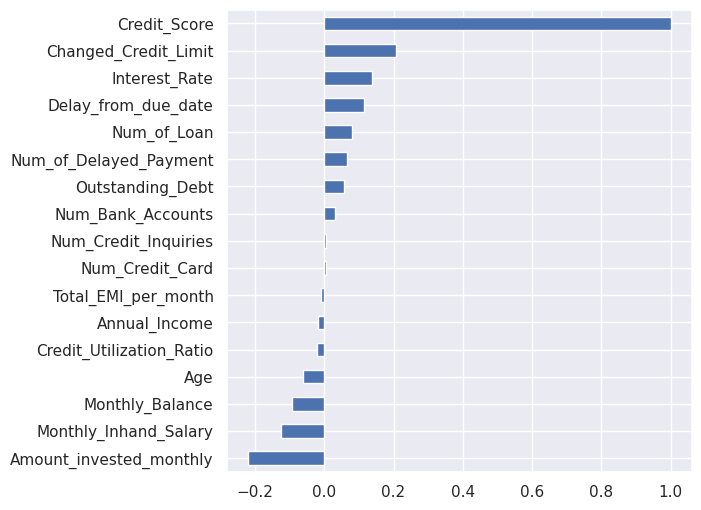

In [ ]:
# Correlation of target variable with features after numerical transformation


numerical_df = df.select_dtypes(include=[np.number])
correlation_series = numerical_df.corr()['Credit_Score'][:-1].sort_values()
correlation_series.plot.barh();

In [ ]:
## Encoding for categorical columns

# select columns of type 'object'
df.select_dtypes(include=['object']).columns

Index(['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour'],
      dtype='object')

In [ ]:
payment_behaviour_categories = ['Low_spent_Small_value_payments',
                                'Low_spent_Medium_value_payments',
                                'Low_spent_Large_value_payments',
                                'High_spent_Small_value_payments',
                                'High_spent_Medium_value_payments',
                                'High_spent_Large_value_payments']

payment_behaviour_encoder = OrdinalEncoder(categories=[payment_behaviour_categories])

df['Payment_Behaviour'] = payment_behaviour_encoder.fit_transform(df[['Payment_Behaviour']])


In [ ]:
#credit_mix_categories = ['Bad', 'Standard', 'Good']
#credit_mix_encoder = OrdinalEncoder(categories=[credit_mix_categories])


label_encoder = OrdinalEncoder()
df['Credit_Mix'] = label_encoder.fit_transform(df[['Credit_Mix']])

In [ ]:
label_encoder = LabelEncoder()
df['Payment_of_Min_Amount'] = label_encoder.fit_transform(df['Payment_of_Min_Amount'])

In [ ]:
label_encoder = LabelEncoder()
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])

In [ ]:
df.shape

(89973, 22)

In [ ]:
df.head().T

,0,1,2,3,4
Age,23.000000,23.000000,5.000000,23.000000,23.000000
Occupation,12.000000,12.000000,12.000000,12.000000,12.000000
Annual_Income,19114.120000,19114.120000,19114.120000,19114.120000,19114.120000
Monthly_Inhand_Salary,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333
Num_Bank_Accounts,3.000000,3.000000,3.000000,3.000000,3.000000
Num_Credit_Card,4.000000,4.000000,4.000000,4.000000,4.000000
Interest_Rate,3.000000,3.000000,3.000000,3.000000,3.000000
Num_of_Loan,4.000000,4.000000,4.000000,4.000000,4.000000
Delay_from_due_date,3.000000,-1.000000,3.000000,5.000000,6.000000
Num_of_Delayed_Payment,7.000000,0.000000,7.000000,4.000000,0.000000


In [ ]:
# Separate properties and target variable

X = df.drop("Credit_Score", axis=1)
y = df.Credit_Score

In [ ]:
y.value_counts(normalize=True)

Credit_Score
2    0.526691
1    0.293744
0    0.179565
Name: proportion, dtype: float64

In [ ]:
from imblearn.over_sampling import SMOTE

 # Synthetic Minority Oversampling Technique

smote = SMOTE()
X, y = smote.fit_resample(X,y)

In [ ]:
y.value_counts()

Credit_Score
0    47388
2    47388
1    47388
Name: count, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,
                                                    stratify=y, shuffle=True, random_state=42)

In [ ]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (99514, 21) (99514,)
Testing set shape: (42650, 21) (42650,)


In [ ]:
## Scale Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train and Evaluate

In [ ]:
# function for ML model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## Import evaluate package.
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
confusion_matrix, ConfusionMatrixDisplay, auc, roc_curve, RocCurveDisplay,classification_report

### 1.Logostic Regression

In [ ]:
# Logistic Regression
%%time

glm = LogisticRegression(random_state=44)

cv_params = {'C': 10**np.linspace(-3,3,20)
             }

# Define a set of scoring metrics to capture
scoring = {'accuracy', 'precision_macro', 'recall_macro', 'f1_macro'}

# Instantiate the GridSearchCV object
glm1 = GridSearchCV(glm, param_grid = cv_params, scoring=scoring, cv=5, refit='f1_macro')

glm1.fit(X_train, y_train)

CPU times: user 4min 35s, sys: 2min 26s, total: 7min 2s
Wall time: 4min 18s


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=44),
             param_grid={'C': array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03])},
             refit='f1_macro',
             scoring={'accuracy', 'f1_macro', 'precision_macro',
                      'recall_macro'})

In [ ]:
## call metrics to see scorer name
import sklearn

sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [ ]:
y_glm = glm1.predict(X_test)

In [ ]:
print(classification_report(y_glm, y_test))

              precision    recall  f1-score   support

           0       0.86      0.71      0.78     17247
           1       0.67      0.75      0.71     12718
           2       0.57      0.64      0.61     12685

    accuracy                           0.70     42650
   macro avg       0.70      0.70      0.70     42650
weighted avg       0.72      0.70      0.71     42650



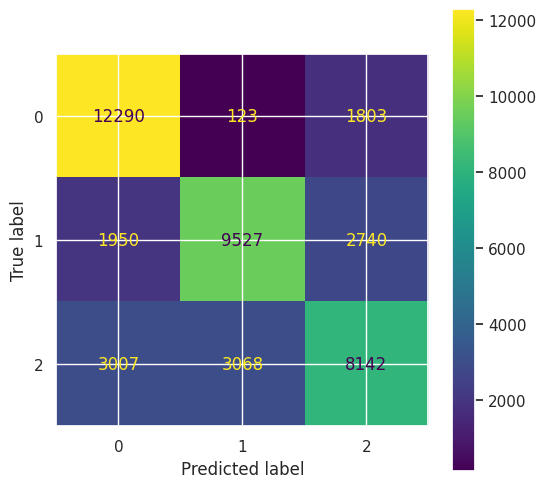

In [ ]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, y_glm, labels=glm1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=glm1.classes_,
                             )
disp.plot(values_format='');

In [ ]:
results = {'precision' : precision_score(y_glm, y_test, average=None),
           'recall' : recall_score(y_glm, y_test, average=None),
           'f1' : f1_score(y_glm, y_test, average=None),
           'accuracy' : accuracy_score(y_glm, y_test)}
results = pd.DataFrame(results)
#results.filter(items=[2], axis=0)
results

,precision,recall,f1,accuracy
0,0.864519,0.712588,0.781235,0.702438
1,0.670113,0.749096,0.707407,0.702438
2,0.572695,0.641860,0.605308,0.702438


In [ ]:
## model cross validation results
pd.DataFrame(glm1.cv_results_).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
mean_fit_time,1.245956,1.177139,1.763603,1.744138,2.257588,2.745112,3.190031,2.738133,2.781236,2.757912,2.714464,2.697526,2.662994,2.74095,2.663121,2.566928,2.528458,2.650595,3.40099,2.534875
std_fit_time,0.421767,0.066846,0.378584,0.48091,0.485691,0.576919,0.992053,0.549231,0.733099,0.801134,0.48067,0.66218,0.575899,0.53933,0.843024,0.56069,0.369966,0.73432,0.438657,0.430808
mean_score_time,0.0485,0.049249,0.070344,0.051981,0.046827,0.054058,0.067142,0.056751,0.05809,0.054693,0.052765,0.055659,0.056488,0.057676,0.061162,0.055061,0.056132,0.049881,0.07801,0.05233
std_score_time,0.00181,0.001569,0.027487,0.007816,0.001886,0.01582,0.026156,0.019265,0.019482,0.012289,0.010323,0.016984,0.020782,0.021864,0.019473,0.015596,0.019426,0.006376,0.026921,0.007656
param_C,0.001,0.002069,0.004281,0.008859,0.01833,0.037927,0.078476,0.162378,0.335982,0.695193,1.43845,2.976351,6.158482,12.74275,26.366509,54.555948,112.883789,233.572147,483.293024,1000.0
params,{'C': 0.001},{'C': 0.00206913808111479},{'C': 0.004281332398719396},{'C': 0.008858667904100823},{'C': 0.018329807108324356},{'C': 0.0379269019073225},{'C': 0.07847599703514611},{'C': 0.1623776739188721},{'C': 0.3359818286283781},{'C': 0.6951927961775606},{'C': 1.438449888287663},{'C': 2.976351441631316},{'C': 6.158482110660261},{'C': 12.742749857031322},{'C': 26.366508987303554},{'C': 54.555947811685144},{'C': 112.88378916846884},{'C': 233.57214690901213},{'C': 483.2930238571752},{'C': 1000.0}
split0_test_accuracy,0.67623,0.685826,0.694518,0.698839,0.69899,0.699894,0.699091,0.700397,0.700648,0.700698,0.700598,0.700397,0.700548,0.70095,0.700749,0.700698,0.700598,0.700196,0.700196,0.700548
split1_test_accuracy,0.669246,0.681405,0.691403,0.695021,0.698186,0.698186,0.698236,0.698839,0.698538,0.698337,0.698236,0.698337,0.698136,0.698136,0.698287,0.698136,0.698035,0.698488,0.698437,0.698086
split2_test_accuracy,0.678189,0.68864,0.694116,0.694971,0.696629,0.697382,0.697282,0.697131,0.69693,0.69688,0.696679,0.696729,0.696679,0.696528,0.696528,0.696478,0.696679,0.696629,0.696578,0.696528
split3_test_accuracy,0.678189,0.690097,0.69894,0.703713,0.705271,0.704617,0.704768,0.704266,0.704416,0.704266,0.704115,0.704416,0.704366,0.704467,0.704416,0.704165,0.704617,0.704467,0.704366,0.704366


In [ ]:
### make result for train dataset
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision_macro': 'mean_test_precision_macro',
                 'recall_macro': 'mean_test_recall_macro',
                 'f1_macro': 'mean_test_f1_macro',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1_macro
    recall = best_estimator_results.mean_test_recall_macro
    precision = best_estimator_results.mean_test_precision_macro
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

In [ ]:
glm_result = make_results('LogisticRegression_CV', glm1, 'f1_macro')
glm_result

,model,precision,recall,F1,accuracy
0,LogisticRegression_CV,0.698719,0.700342,0.695869,0.700344


In [ ]:
### make result for test dataset
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''

    table = pd.DataFrame({'model' : [model_name],
               'precision' : [precision_score(preds, y_test_data, average='macro')],
               'recall' : [recall_score(preds, y_test_data, average='macro')],
               'F1' : [f1_score(preds, y_test_data, average='macro')],
               'accuracy' : [accuracy_score(preds, y_test_data)]})

    return table

In [ ]:
glm_test_score = get_test_scores('LogisticRegression_Test', y_glm, y_test)
glm_test_score

,model,precision,recall,F1,accuracy
0,LogisticRegression_Test,0.702442,0.701181,0.697983,0.702438


In [ ]:
results = {'precision' : precision_score(y_glm, y_test, average=None),
           'recall' : recall_score(y_glm, y_test, average=None),
           'f1' : f1_score(y_glm, y_test, average=None),
           'accuracy' : accuracy_score(y_glm, y_test)}
results = pd.DataFrame(results)
#results.filter(items=[2], axis=0)
pd.DataFrame(results.mean()).T

,precision,recall,f1,accuracy
0,0.702442,0.701181,0.697983,0.702438


In [ ]:
## compare result of train and test
results_table = pd.concat([glm_result, glm_test_score], axis=0)
results_table

,model,precision,recall,F1,accuracy
0,LogisticRegression_CV,0.698719,0.700342,0.695869,0.700344
0,LogisticRegression_Test,0.702442,0.701181,0.697983,0.702438


### 2. Naives Bayes

In [ ]:
### Naives Bayes
%%time

gnb = GaussianNB()

cv_params = {'var_smoothing': [1e-8, 1e-9, 1e-10, 1e-11,1e-12, 1e-13, 1e-14]}

# 3. Define a set of scoring metrics to capture
scoring = {'accuracy', 'precision_macro', 'recall_macro', 'f1_macro'}

# 4. Instantiate the GridSearchCV object
gnb1 = GridSearchCV(gnb, param_grid = cv_params, scoring=scoring, cv=5, refit='f1_macro')

gnb1.fit(X_train, y_train)

CPU times: user 3.16 s, sys: 7.59 ms, total: 3.16 s
Wall time: 3.17 s


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-08, 1e-09, 1e-10, 1e-11, 1e-12,
                                           1e-13, 1e-14]},
             refit='f1_macro',
             scoring={'accuracy', 'f1_macro', 'precision_macro',
                      'recall_macro'})

In [ ]:
# Get the predictions on test data
y_gnb_preds = gnb1.predict(X_test)

In [ ]:
print(classification_report(y_test, gnb1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.68      0.88      0.77     14216
           1       0.69      0.78      0.73     14217
           2       0.72      0.41      0.52     14217

    accuracy                           0.69     42650
   macro avg       0.70      0.69      0.68     42650
weighted avg       0.70      0.69      0.68     42650



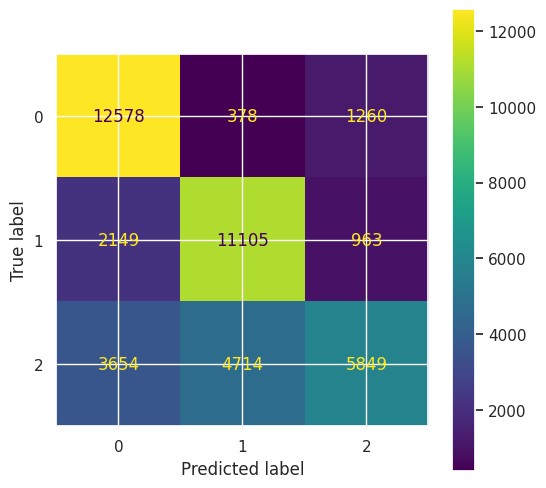

In [ ]:
# Compute values for confusion matrix
gnb_cm = confusion_matrix(y_test, y_gnb_preds, labels=gnb1.classes_)

# Create display of confusion matrix
gnb_disp = ConfusionMatrixDisplay(confusion_matrix=gnb_cm, display_labels=gnb1.classes_)

# Plot confusion matrix
gnb_disp.plot()

# Display plot
plt.show()

In [ ]:
## Result of Naives Bayes
gnb_result = make_results('NaiveBayes_CV', gnb1, 'f1_macro')
gnb_test_scores = get_test_scores('NaiveBayes_Test', y_gnb_preds, y_test)

results_table = pd.concat([results_table, gnb_result, gnb_test_scores], axis=0)
results_table

,model,precision,recall,F1,accuracy
0,LogisticRegression_CV,0.698719,0.700342,0.695869,0.700344
0,LogisticRegression_Test,0.702442,0.701181,0.697983,0.702438
0,NaiveBayes_CV,0.695773,0.690625,0.674083,0.690626
0,NaiveBayes_Test,0.692431,0.698173,0.675605,0.692427


### 3. Decision Tree

In [ ]:
## Decision Tree

from sklearn.model_selection import RandomizedSearchCV
# 1. Instantiate the decision tree classifier
tree = DecisionTreeClassifier(random_state=44)

# 2. Create a dictionary of hyperparameters to tune


#creterion The function to measure the quality of a split
#criterion = ['gini','entropy', 'log_loss']

# The strategy used to choose the split at each node
#splitter = ['best', 'random']

#The number of features to consider when looking for the best split
max_features = [float(x) for x in np.linspace(0.0,1, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 20, num = 15)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(2, 15, num = 5)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(1, 15, num = 5)]


random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
               }


# 3. Define a set of scoring metrics to capture
scoring = {'accuracy', 'precision_macro', 'recall_macro', 'f1_macro'}

In [ ]:
## RandomizedSearchCV
%%time
tree_cv = RandomizedSearchCV(estimator = tree,
                               param_distributions = random_grid,
                               n_iter = 100,
                               cv = 5,
                               verbose=100,
                               random_state=44,
                               n_jobs = -1)
# Fit the random search model
tree_cv.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: user 6.73 s, sys: 1.41 s, total: 8.13 s
Wall time: 5min 25s


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=44),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 5, 6, 7, 9, 10,
                                                      11, 13, 14, 15, 17, 18,
                                                      20, None],
                                        'max_features': [0.0,
                                                         0.1111111111111111,
                                                         0.2222222222222222,
                                                         0.3333333333333333,
                                                         0.4444444444444444,
                                                         0.5555555555555556,
                                                         0.6666666666666666,
                                                         0.7777777777777777,
                                                         0.8888888888888888,
                                                         1.0],
                                        'min_samples_leaf': [1, 4, 8, 11, 15],
                                        'min_samples_split': [2, 5, 8, 11, 15]},
                   random_state=44, verbose=100)

In [ ]:
tree_cv.best_params_

{'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_features': 0.4444444444444444,
 'max_depth': 20}

In [ ]:
print(classification_report(y_test, tree_cv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85     14216
           1       0.80      0.80      0.80     14217
           2       0.76      0.68      0.72     14217

    accuracy                           0.79     42650
   macro avg       0.79      0.79      0.79     42650
weighted avg       0.79      0.79      0.79     42650



In [ ]:
tree = DecisionTreeClassifier(random_state=44)

# 2. Create a dictionary of hyperparameters to tune


#creterion The function to measure the quality of a split
#criterion = ['gini','entropy', 'log_loss']

# The strategy used to choose the split at each node
#splitter = ['best', 'random']

#The number of features to consider when looking for the best split
max_features = [0.4444444444, 0.45, 0.4355555]
# Maximum number of levels in tree
max_depth = [20,21]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [8,9]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2]


cv_params = {  'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


# 3. Define a set of scoring metrics to capture
scoring = {'accuracy', 'precision_macro', 'recall_macro', 'f1_macro'}

# 4. Instantiate the GridSearchCV object
tree1 = GridSearchCV(tree, param_grid = cv_params, scoring=scoring, cv=5, refit='f1_macro')

In [ ]:
%%time
# GridSearchCV
tree1.fit(X_train, y_train)

CPU times: user 3min 18s, sys: 11.7 ms, total: 3min 18s
Wall time: 3min 20s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=44),
             param_grid={'max_depth': [20, 21, None],
                         'max_features': [0.4444444444, 0.45, 0.4355555],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [8, 9]},
             refit='f1_macro',
             scoring={'accuracy', 'f1_macro', 'precision_macro',
                      'recall_macro'})

In [ ]:
print(classification_report(y_test, tree1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85     14216
           1       0.80      0.80      0.80     14217
           2       0.76      0.68      0.72     14217

    accuracy                           0.79     42650
   macro avg       0.79      0.79      0.79     42650
weighted avg       0.79      0.79      0.79     42650



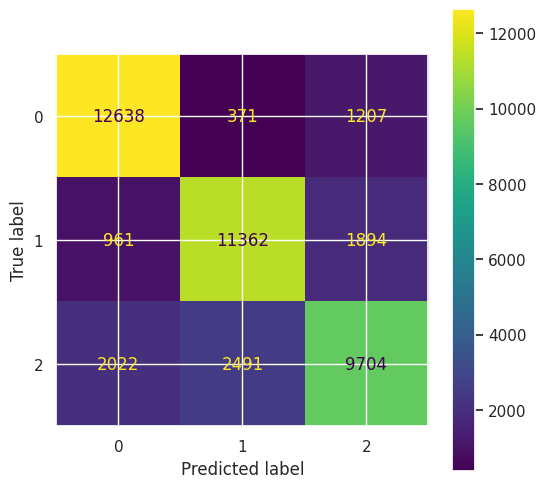

In [ ]:
# Compute values for confusion matrix
tree_cm = confusion_matrix(y_test, tree1.predict(X_test), labels=tree1.classes_)

# Create display of confusion matrix
tree_disp = ConfusionMatrixDisplay(confusion_matrix= tree_cm, display_labels=tree1.classes_)

# Plot confusion matrix
tree_disp.plot()

# Display plot
plt.show()

In [ ]:
y_tree_preds = tree1.predict(X_test)
tree_result = make_results('DecisionTree_CV', tree1, 'f1_macro')
tree_test_scores = get_test_scores('DecisionTree_Test', y_tree_preds, y_test)

results_table = pd.concat([results_table, tree_result, tree_test_scores], axis=0)
results_table

,model,precision,recall,F1,accuracy
0,LogisticRegression_CV,0.698719,0.700342,0.695869,0.700344
0,LogisticRegression_Test,0.702442,0.701181,0.697983,0.702438
0,NaiveBayes_CV,0.695773,0.690625,0.674083,0.690626
0,NaiveBayes_Test,0.692431,0.698173,0.675605,0.692427
0,DecisionTree_CV,0.780797,0.782412,0.780413,0.782413
0,DecisionTree_Test,0.790249,0.788553,0.788118,0.790246


### 4.Random Forest

In [ ]:
## Random Forest
%%time

## Random Hyperparameter Grid
rf = RandomForestClassifier(random_state=44)

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 30, num = 10)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
max_features =[float(x) for x in np.linspace(start=0.0, stop=1.0, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3,10, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(2, 15, num = 10)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(3, 15, num = 10)]
# Method of selecting samples for training each tree
bootstrap = [True, False]


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

## RandomizedSearchCV
rf_cv = RandomizedSearchCV(estimator = rf,
                               param_distributions = random_grid,
                               n_iter = 10,
                               cv = 5,
                               verbose=100,
                               random_state=44,
                               n_jobs = 1)
# Fit the random search model
rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START bootstrap=True, max_depth=4, max_features=0.4444444444444444, min_samples_leaf=4, min_samples_split=2, n_estimators=1
[CV 1/5; 1/10] END bootstrap=True, max_depth=4, max_features=0.4444444444444444, min_samples_leaf=4, min_samples_split=2, n_estimators=1;, score=0.736 total time=   0.3s
[CV 2/5; 1/10] START bootstrap=True, max_depth=4, max_features=0.4444444444444444, min_samples_leaf=4, min_samples_split=2, n_estimators=1
[CV 2/5; 1/10] END bootstrap=True, max_depth=4, max_features=0.4444444444444444, min_samples_leaf=4, min_samples_split=2, n_estimators=1;, score=0.732 total time=   0.3s
[CV 3/5; 1/10] START bootstrap=True, max_depth=4, max_features=0.4444444444444444, min_samples_leaf=4, min_samples_split=2, n_estimators=1
[CV 3/5; 1/10] END bootstrap=True, max_depth=4, max_features=0.4444444444444444, min_samples_leaf=4, min_samples_split=2, n_estimators=1;, score=0.727 total time=   0.3s
[CV 4/5; 1/1

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=44),
                   n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 4, 6, 8, 10, None],
                                        'max_features': [0.0,
                                                         0.1111111111111111,
                                                         0.2222222222222222,
                                                         0.3333333333333333,
                                                         0.4444444444444444,
                                                         0.5555555555555556,
                                                         0.6666666666666666,
                                                         0.7777777777777777,
                                                         0.8888888888888888,
                                                         1.0],
                                        'min_samples_leaf': [3, 4, 5, 7, 8, 9,
                                                             11, 12, 13, 15],
                                        'min_samples_split': [2, 3, 4, 6, 7, 9,
                                                              10, 12, 13, 15],
                                        'n_estimators': [1, 4, 7, 10, 13, 17,
                                                         20, 23, 26, 30]},
                   random_state=44, verbose=100)

In [ ]:
rf_cv.best_params_

{'n_estimators': 10,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 0.3333333333333333,
 'max_depth': None,
 'bootstrap': True}

In [ ]:
print(classification_report(y_test, rf_cv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89     14216
           1       0.85      0.86      0.86     14217
           2       0.83      0.74      0.78     14217

    accuracy                           0.85     42650
   macro avg       0.84      0.85      0.84     42650
weighted avg       0.84      0.85      0.84     42650



In [ ]:
,### Grid Search
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=44)

# 2. Create a dictionary of hyperparameters to tune
# Note that this example only contains 1 value for each parameter for simplicity,
# but you should assign a dictionary with ranges of values
cv_params = {'max_depth': [None],
             'max_features': [0.3333333333333333, 0.45],
             'min_samples_leaf': [4],
             'min_samples_split': [4],
             'n_estimators': [10,15],
             'bootstrap' : [True]
             }

# 3. Define a set of scoring metrics to capture
scoring = {'accuracy', 'precision_macro', 'recall_macro', 'f1_macro'}

# 4. Instantiate the GridSearchCV object
rf1 = GridSearchCV(rf, param_grid = cv_params, scoring=scoring, cv=5, refit='f1_macro', n_jobs = 1)

In [ ]:
%%time
rf1.fit(X_train, y_train)

CPU times: user 2min 50s, sys: 114 ms, total: 2min 50s
Wall time: 2min 51s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=44), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [None],
                         'max_features': [0.3333333333333333, 0.45],
                         'min_samples_leaf': [4], 'min_samples_split': [4],
                         'n_estimators': [10, 15]},
             refit='f1_macro',
             scoring={'accuracy', 'f1_macro', 'precision_macro',
                      'recall_macro'})

In [ ]:
y_rf_preds = rf1.predict(X_test)

print(classification_report(y_test, rf1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89     14216
           1       0.85      0.87      0.86     14217
           2       0.84      0.74      0.79     14217

    accuracy                           0.85     42650
   macro avg       0.85      0.85      0.85     42650
weighted avg       0.85      0.85      0.85     42650



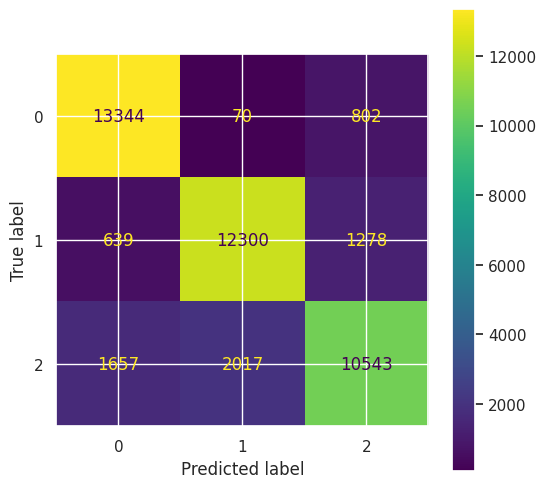

In [ ]:
# Compute values for confusion matrix
rf_cm = confusion_matrix(y_test, y_rf_preds, labels=rf1.classes_)

# Create display of confusion matrix
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=rf1.classes_)

# Plot confusion matrix
rf_disp.plot()

# Display plot
plt.show()

In [ ]:

rf_result = make_results('RandomForest_CV', rf1, 'f1_macro')
rf_test_scores = get_test_scores('RandomForest_Test', y_rf_preds, y_test)

results_table = pd.concat([results_table, rf_result, rf_test_scores], axis=0)
results_table

,model,precision,recall,F1,accuracy
0,LogisticRegression_CV,0.698719,0.700342,0.695869,0.700344
0,LogisticRegression_Test,0.702442,0.701181,0.697983,0.702438
0,NaiveBayes_CV,0.695773,0.690625,0.674083,0.690626
0,NaiveBayes_Test,0.692431,0.698173,0.675605,0.692427
0,DecisionTree_CV,0.780797,0.782412,0.780413,0.782413
0,DecisionTree_Test,0.790249,0.788553,0.788118,0.790246
0,RandomForest_CV,0.840269,0.840806,0.838686,0.840806
0,RandomForest_Test,0.848466,0.847786,0.846510,0.848464


In [ ]:
xgb_cv = RandomizedSearchCV(estimator = xgb,
                               param_distributions = random_grid_xgb,
                               n_iter = 10,
                               cv = 5,
                               verbose=100,
                               random_state=44,
                               n_jobs = 1)

### 5. XGBoost

In [ ]:
##XGBoost
%%time

xgb = XGBClassifier()

#Analogous to the learning rate in GBM.
eta = [float(x) for x in np.linspace(0.01,0.2, 10)]
#The maximum depth of a tree. Used to control over-fitting.
max_depth = [int(x) for x in np.linspace(3,10,8)]
#The maximum number of terminal nodes or leaves in a tree.
max_leaf_nodes = [int(x) for x in np.linspace(3,10,5)]
#Denotes the fraction of columns to be random samples for each tree.
colsample_bytree = [float(x) for x in np.linspace(0.5,1, 10)]
#Denotes the fraction of observations to be random samples for each tree
subsample = [float(x) for x in np.linspace(0.5,1, 10)]

random_grid_xgb = {'eta': eta,
                     'max_depth' : max_depth,
                     'max_leaf_nodes': max_leaf_nodes,
                     'colsample_bytree': colsample_bytree,
                     'subsample': subsample}

## RandomizedSearchCV
xgb_cv = RandomizedSearchCV(estimator = xgb,
                               param_distributions = random_grid_xgb,
                               n_iter = 10,
                               cv = 5,
                               verbose=100,
                               random_state=44,
                               n_jobs = 1)
# Fit the random search model
xgb_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START colsample_bytree=0.6666666666666666, eta=0.11555555555555555, max_depth=5, max_leaf_nodes=3, subsample=0.5
[CV 1/5; 1/10] END colsample_bytree=0.6666666666666666, eta=0.11555555555555555, max_depth=5, max_leaf_nodes=3, subsample=0.5;, score=0.790 total time=   3.5s
[CV 2/5; 1/10] START colsample_bytree=0.6666666666666666, eta=0.11555555555555555, max_depth=5, max_leaf_nodes=3, subsample=0.5
[CV 2/5; 1/10] END colsample_bytree=0.6666666666666666, eta=0.11555555555555555, max_depth=5, max_leaf_nodes=3, subsample=0.5;, score=0.786 total time=   3.4s
[CV 3/5; 1/10] START colsample_bytree=0.6666666666666666, eta=0.11555555555555555, max_depth=5, max_leaf_nodes=3, subsample=0.5
[CV 3/5; 1/10] END colsample_bytree=0.6666666666666666, eta=0.11555555555555555, max_depth=5, max_leaf_nodes=3, subsample=0.5;, score=0.786 total time=   6.4s
[CV 4/5; 1/10] START colsample_bytree=0.6666666666666666, eta=0.11555555555555

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                                0.09444444444444444,
                                                0.11555555555555555,
                                                0.1366666666666667,
                                                0.1577777777777778,
                                                0.1788888888888889, 0.2],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'max_leaf_nodes': [3, 4, 6, 8, 10],
                                        'subsample': [0.5, 0.5555555555555556,
                                                      0.6111111111111112,
                                                      0.6666666666666666,
                                                      0.7222222222222222,
                                                      0.7777777777777778,
                                                      0.8333333333333333,
                                                      0.8888888888888888,
                                                      0.9444444444444444,
                                                      1.0]},
                   random_state=44, verbose=100)

In [ ]:
xgb_cv.best_params_

{'subsample': 0.7777777777777778,
 'max_leaf_nodes': 6,
 'max_depth': 10,
 'eta': 0.2,
 'colsample_bytree': 0.6111111111111112}

In [ ]:
print(classification_report(y_test, xgb_cv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     14216
           1       0.88      0.89      0.88     14217
           2       0.85      0.79      0.82     14217

    accuracy                           0.88     42650
   macro avg       0.88      0.88      0.88     42650
weighted avg       0.88      0.88      0.88     42650



In [ ]:
,### Grid Search
# 1. Instantiate the random forest classifier
xgb = XGBClassifier()

# 2. Create a dictionary of hyperparameters to tune
# Note that this example only contains 1 value for each parameter for simplicity,
# but you should assign a dictionary with ranges of values
cv_params = {'eta': [0.2],
             'max_depth' : [10],
             'max_leaf_nodes': [6],
             'colsample_bytree': [0.6111111111111112,0.77774],
             'subsample': [0.7777777777777778,0.811]}

# 3. Define a set of scoring metrics to capture
scoring = {'accuracy', 'precision_macro', 'recall_macro', 'f1_macro'}

# 4. Instantiate the GridSearchCV object
xgb1 = GridSearchCV(xgb, param_grid = cv_params, scoring=scoring, cv=5, refit='f1_macro')

In [ ]:
%%time
xgb1.fit(X_train, y_train)

CPU times: user 7min 3s, sys: 1.5 s, total: 7min 4s
Wall time: 4min 20s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.6111111111111112, 0.77774],
                         'eta': [0.2], 'max_depth': [10], 'max_leaf_nodes': [6],
                         'subsample': [0.7777777777777778, 0.811]},
             refit='f1_macro',
             scoring={'accuracy', 'f1_macro', 'precision_macro',
                      'recall_macro'})

In [ ]:
y_xgb_preds = xgb1.predict(X_test)

print(classification_report(y_test, y_xgb_preds))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     14216
           1       0.88      0.90      0.89     14217
           2       0.85      0.80      0.82     14217

    accuracy                           0.88     42650
   macro avg       0.88      0.88      0.88     42650
weighted avg       0.88      0.88      0.88     42650



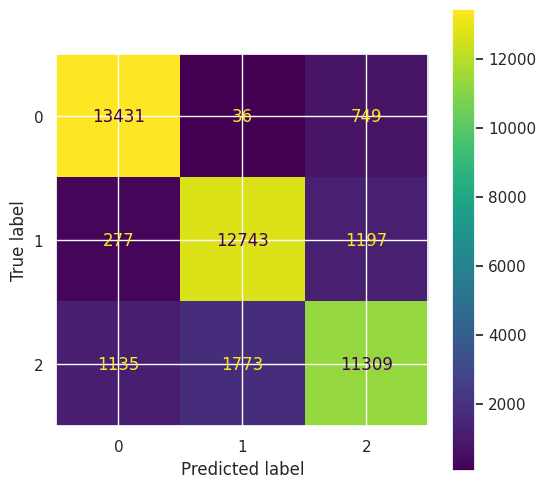

In [ ]:
# Compute values for confusion matrix
xgb_cm = confusion_matrix(y_test, y_xgb_preds, labels=xgb1.classes_)

# Create display of confusion matrix
xgb_disp = ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=xgb1.classes_)

# Plot confusion matrix
xgb_disp.plot()

# Display plot
plt.show()

In [ ]:
xgb_result = make_results('XGBoost_CV', xgb1, 'f1_macro')
xgb_test_scores = get_test_scores('XGBoost_Test', y_xgb_preds, y_test)

results_table = pd.concat([results_table, xgb_result, xgb_test_scores], axis=0)
results_table

,model,precision,recall,F1,accuracy
0,LogisticRegression_CV,0.698719,0.700342,0.695869,0.700344
0,LogisticRegression_Test,0.702442,0.701181,0.697983,0.702438
0,NaiveBayes_CV,0.695773,0.690625,0.674083,0.690626
0,NaiveBayes_Test,0.692431,0.698173,0.675605,0.692427
0,DecisionTree_CV,0.780797,0.782412,0.780413,0.782413
0,DecisionTree_Test,0.790249,0.788553,0.788118,0.790246
0,RandomForest_CV,0.840269,0.840806,0.838686,0.840806
0,RandomForest_Test,0.848466,0.847786,0.846510,0.848464
0,XGBoost_CV,0.869479,0.870460,0.869450,0.870460
0,XGBoost_Test,0.878853,0.877915,0.877863,0.878851


## Summary

In [ ]:
train_results_table = pd.DataFrame()
train_results_table = pd.concat([glm_result, gnb_result, tree_result, rf_result, xgb_result], axis=0)
train_results_table

,model,precision,recall,F1,accuracy
0,LogisticRegression_CV,0.698719,0.700342,0.695869,0.700344
0,NaiveBayes_CV,0.695773,0.690625,0.674083,0.690626
0,DecisionTree_CV,0.780797,0.782412,0.780413,0.782413
0,RandomForest_CV,0.840269,0.840806,0.838686,0.840806
0,XGBoost_CV,0.869479,0.870460,0.869450,0.870460


In [ ]:
test_results_table = pd.DataFrame()
test_results_table = pd.concat([glm_test_score, gnb_test_scores, tree_test_scores, rf_test_scores, xgb_test_scores], axis=0)
test_results_table

,model,precision,recall,F1,accuracy
0,LogisticRegression_Test,0.702442,0.701181,0.697983,0.702438
0,NaiveBayes_Test,0.692431,0.698173,0.675605,0.692427
0,DecisionTree_Test,0.790249,0.788553,0.788118,0.790246
0,RandomForest_Test,0.848466,0.847786,0.846510,0.848464
0,XGBoost_Test,0.878853,0.877915,0.877863,0.878851


- from the results of the model and evaluate metrics, The best model for credit score is XGBoost by the accuracy, f1-score, precision score, and recall score and accepted the accuraccy at 87.92%

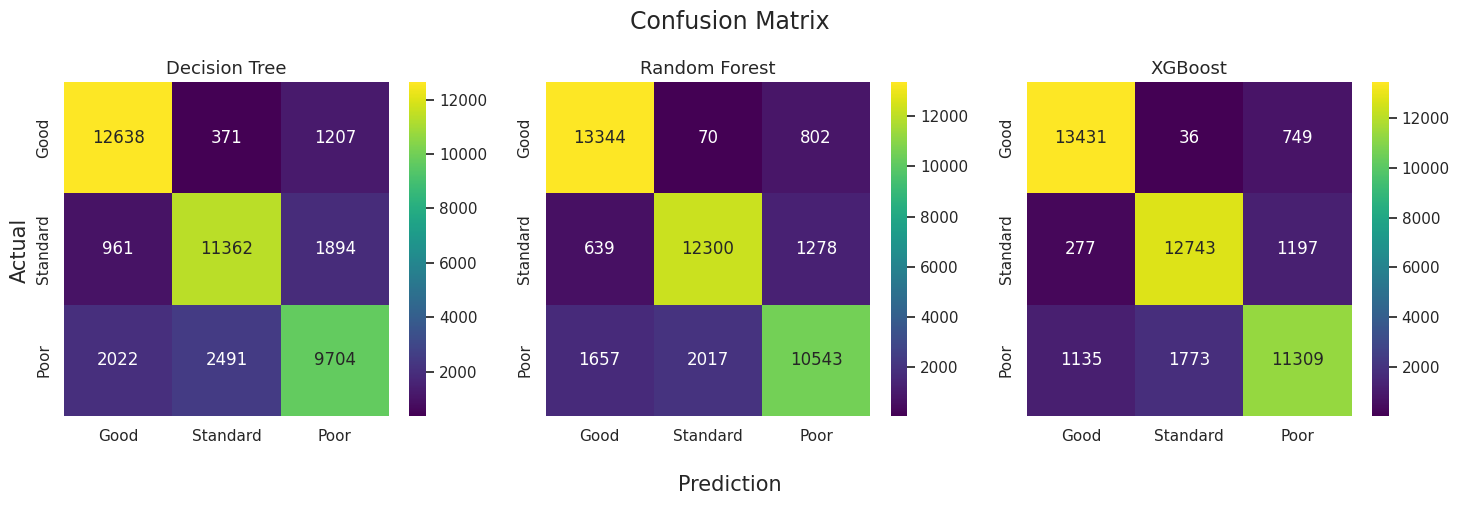

In [ ]:
## Target Lable Classes
target_value = {'model_classes': xgb1.classes_,
                'lable_classes' : np.array(['Good', 'Standard', 'Poor'])}
target_value = pd.DataFrame(target_value)

## Create a 2*4 plot figure
fig, axes = plt.subplots(1,3, figsize=(15,5))
plt.suptitle('Confusion Matrix',fontsize=17)
fig.supylabel('Actual', fontsize=15)
fig.supxlabel('Prediction',fontsize=15)

# Plot the confusion matrix
#plt.figure(figsize=(7,6))
sns.heatmap(tree_cm, annot=True,fmt='d', cmap='viridis',
            xticklabels=target_value.lable_classes,
            yticklabels=target_value.lable_classes,
            ax=axes[0])
axes[0].set_title("Decision Tree",fontsize=13)


sns.heatmap(rf_cm, annot=True,fmt='d', cmap='viridis',
            xticklabels=target_value.lable_classes,
            yticklabels=target_value.lable_classes,
            ax=axes[1])
axes[1].set_title("Random Forest",fontsize=13)


sns.heatmap(xgb_cm, annot=True,fmt='d', cmap='viridis',
            xticklabels=target_value.lable_classes,
            yticklabels=target_value.lable_classes,
            ax=axes[2])
axes[2].set_title("XGBoost",fontsize=13)

plt.tight_layout()
plt.show()